In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [2]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2010')

# Load data from a JSONL file
market = Market.loader('2010/03/01','2010/04/01', data_path)

100%|██████████| 48/48 [20:11<00:00, 25.25s/it]


In [34]:
# Get periods of length 15
periods = market.get_periods_fast(period_length=1800)
print(f"Number of periods: {len(periods)}")

  0%|          | 0/25808306 [00:00<?, ?it/s]

New Period 1267513200.0 1267515000.0


  1%|          | 132996/25808306 [00:05<15:53, 26929.99it/s]

Periods Created !
New Period 1267515000.0 1267516800.0


  1%|          | 171121/25808306 [00:11<30:51, 13847.72it/s]

Periods Created !
New Period 1267516800.0 1267518600.0


  1%|          | 212566/25808306 [00:16<39:28, 10808.09it/s]

Periods Created !
New Period 1267518600.0 1267520400.0


  1%|          | 269479/25808306 [00:22<39:54, 10667.49it/s]

Periods Created !
New Period 1267520400.0 1267522200.0


  1%|          | 316564/25808306 [00:27<43:01, 9872.93it/s] 

Periods Created !
New Period 1267522200.0 1267524000.0


  1%|▏         | 357993/25808306 [00:33<46:49, 9060.27it/s]

Periods Created !
New Period 1267524000.0 1267525800.0


  2%|▏         | 395705/25808306 [00:39<51:13, 8268.97it/s]

Periods Created !
New Period 1267525800.0 1267527600.0


  2%|▏         | 460857/25808306 [00:44<45:18, 9323.88it/s]

Periods Created !
New Period 1267527600.0 1267529400.0


  2%|▏         | 495718/25808306 [00:50<50:29, 8356.62it/s]

Periods Created !
New Period 1267529400.0 1267531200.0


  2%|▏         | 542778/25808306 [00:55<49:59, 8423.48it/s]

Periods Created !
New Period 1267531200.0 1267533000.0


  2%|▏         | 588571/25808306 [01:01<50:03, 8395.62it/s]

Periods Created !
New Period 1267533000.0 1267534800.0


  2%|▏         | 629728/25808306 [01:06<51:35, 8134.52it/s]

Periods Created !
New Period 1267534800.0 1267536600.0


  3%|▎         | 733185/25808306 [01:12<32:20, 12924.38it/s]

Periods Created !
New Period 1267536600.0 1267538400.0


  3%|▎         | 841217/25808306 [01:17<23:19, 17845.96it/s]

Periods Created !
New Period 1267538400.0 1267540200.0


  3%|▎         | 877222/25808306 [01:23<32:51, 12642.82it/s]

Periods Created !
New Period 1267540200.0 1267542000.0


  4%|▍         | 1070364/25808306 [01:29<17:36, 23413.47it/s]

Periods Created !
New Period 1267542000.0 1267543800.0


  4%|▍         | 1112085/25808306 [01:35<25:06, 16396.98it/s]

Periods Created !
New Period 1267599600.0 1267601400.0


  4%|▍         | 1143645/25808306 [01:41<34:22, 11960.74it/s]

Periods Created !
New Period 1267601400.0 1267603200.0


  5%|▍         | 1213050/25808306 [01:46<34:23, 11917.78it/s]

Periods Created !
New Period 1267603200.0 1267605000.0


  5%|▌         | 1291929/25808306 [01:52<32:46, 12469.18it/s]

Periods Created !
New Period 1267605000.0 1267606800.0


  5%|▌         | 1339029/25808306 [01:58<37:14, 10950.15it/s]

Periods Created !
New Period 1267606800.0 1267608600.0


  5%|▌         | 1383809/25808306 [02:06<45:50, 8881.44it/s] 

Periods Created !
New Period 1267608600.0 1267610400.0


  6%|▌         | 1427762/25808306 [02:15<55:03, 7379.25it/s]

Periods Created !
New Period 1267610400.0 1267612200.0


  6%|▌         | 1455126/25808306 [02:23<1:06:20, 6117.43it/s]

Periods Created !
New Period 1267612200.0 1267614000.0


  6%|▌         | 1494872/25808306 [02:32<1:14:32, 5436.35it/s]

Periods Created !
New Period 1267614000.0 1267615800.0


  6%|▌         | 1532126/25808306 [02:42<1:21:03, 4991.38it/s]

Periods Created !
New Period 1267615800.0 1267617600.0


  6%|▋         | 1620201/25808306 [02:51<57:50, 6969.01it/s]  

Periods Created !
New Period 1267617600.0 1267619400.0


  6%|▋         | 1661948/25808306 [03:01<1:05:45, 6119.82it/s]

Periods Created !
New Period 1267619400.0 1267621200.0


  7%|▋         | 1739462/25808306 [03:10<50:43, 7907.51it/s]  

Periods Created !
New Period 1267621200.0 1267623000.0


  7%|▋         | 1791967/25808306 [03:19<51:43, 7737.41it/s]  

Periods Created !


  7%|▋         | 1859492/25808306 [03:19<23:57, 16657.91it/s]

New Period 1267623000.0 1267624800.0


  8%|▊         | 1950319/25808306 [03:29<28:40, 13864.20it/s]

Periods Created !
New Period 1267624800.0 1267626600.0


  8%|▊         | 2098318/25808306 [03:37<20:47, 19007.56it/s]

Periods Created !
New Period 1267626600.0 1267628400.0


  8%|▊         | 2143936/25808306 [03:43<27:39, 14260.82it/s]

Periods Created !
New Period 1267628400.0 1267630200.0


  9%|▊         | 2230129/25808306 [03:48<27:04, 14509.98it/s]

Periods Created !
New Period 1267686000.0 1267687800.0


  9%|▉         | 2309698/25808306 [03:54<27:30, 14235.30it/s]

Periods Created !
New Period 1267687800.0 1267689600.0


  9%|▉         | 2383243/25808306 [04:00<28:37, 13640.75it/s]

Periods Created !
New Period 1267689600.0 1267691400.0


  9%|▉         | 2437615/25808306 [04:06<31:59, 12176.60it/s]

Periods Created !
New Period 1267691400.0 1267693200.0


 10%|▉         | 2489163/25808306 [04:12<34:59, 11108.39it/s]

Periods Created !
New Period 1267693200.0 1267695000.0


 10%|▉         | 2552872/25808306 [04:17<34:21, 11281.10it/s]

Periods Created !
New Period 1267695000.0 1267696800.0


 10%|█         | 2601398/25808306 [04:23<37:01, 10446.29it/s]

Periods Created !
New Period 1267696800.0 1267698600.0


 10%|█         | 2679914/25808306 [04:30<34:00, 11335.54it/s]

Periods Created !
New Period 1267698600.0 1267700400.0


 11%|█         | 2711491/25808306 [04:39<50:17, 7653.99it/s] 

Periods Created !
New Period 1267700400.0 1267702200.0


 11%|█         | 2781850/25808306 [04:47<44:39, 8594.29it/s]

Periods Created !
New Period 1267702200.0 1267704000.0


 11%|█         | 2794107/25808306 [04:55<1:10:22, 5450.74it/s]

Periods Created !
New Period 1267704000.0 1267705800.0


 11%|█         | 2893875/25808306 [05:05<43:40, 8742.69it/s]  

Periods Created !
New Period 1267705800.0 1267707600.0


 11%|█▏        | 2963580/25808306 [05:14<41:56, 9077.12it/s]  

Periods Created !
New Period 1267707600.0 1267709400.0


 12%|█▏        | 3028498/25808306 [05:22<40:09, 9453.32it/s]

Periods Created !
New Period 1267709400.0 1267711200.0


 12%|█▏        | 3197353/25808306 [05:32<21:34, 17469.71it/s]

Periods Created !


 13%|█▎        | 3231409/25808306 [05:32<16:51, 22316.25it/s]

New Period 1267711200.0 1267713000.0


 13%|█▎        | 3380816/25808306 [05:41<14:43, 25380.14it/s]

Periods Created !
New Period 1267713000.0 1267714800.0


 14%|█▎        | 3485313/25808306 [05:49<18:47, 19793.58it/s]

Periods Created !
New Period 1267714800.0 1267716600.0


 14%|█▎        | 3533262/25808306 [05:57<31:12, 11898.01it/s]

Periods Created !
New Period 1267772400.0 1267774200.0


 14%|█▍        | 3592469/25808306 [06:04<35:30, 10426.23it/s]

Periods Created !
New Period 1267774200.0 1267776000.0


 14%|█▍        | 3652667/25808306 [06:10<35:19, 10451.92it/s]

Periods Created !
New Period 1267776000.0 1267777800.0


 14%|█▍        | 3698817/25808306 [06:16<38:24, 9595.44it/s] 

Periods Created !
New Period 1267777800.0 1267779600.0


 14%|█▍        | 3733872/25808306 [06:22<42:55, 8571.69it/s]

Periods Created !
New Period 1267779600.0 1267781400.0


 15%|█▍        | 3773246/25808306 [06:27<44:57, 8168.98it/s]

Periods Created !
New Period 1267781400.0 1267783200.0


 15%|█▍        | 3821322/25808306 [06:33<44:26, 8246.76it/s]

Periods Created !
New Period 1267783200.0 1267785000.0


 15%|█▍        | 3867457/25808306 [06:39<44:33, 8208.17it/s]

Periods Created !
New Period 1267785000.0 1267786800.0


 15%|█▌        | 3898379/25808306 [06:44<49:07, 7432.40it/s]

Periods Created !
New Period 1267786800.0 1267788600.0


 15%|█▌        | 3927026/25808306 [06:50<54:07, 6737.41it/s]

Periods Created !
New Period 1267788600.0 1267790400.0


 16%|█▌        | 4003722/25808306 [06:57<39:39, 9164.03it/s]

Periods Created !
New Period 1267790400.0 1267792200.0


 16%|█▌        | 4112146/25808306 [07:05<24:06, 14999.82it/s] 

Periods Created !
New Period 1267792200.0 1267794000.0


 16%|█▌        | 4141737/25808306 [07:13<42:48, 8435.20it/s] 

Periods Created !
New Period 1267794000.0 1267795800.0


 17%|█▋        | 4300904/25808306 [07:21<19:56, 17978.12it/s]

Periods Created !
New Period 1267795800.0 1267797600.0


 17%|█▋        | 4401718/25808306 [07:29<21:09, 16862.83it/s]

Periods Created !
New Period 1267797600.0 1267799400.0


 18%|█▊        | 4578386/25808306 [07:37<15:02, 23525.73it/s]

Periods Created !
New Period 1267799400.0 1267801200.0


 18%|█▊        | 4663201/25808306 [07:45<19:58, 17639.39it/s]

Periods Created !


 18%|█▊        | 4697672/25808306 [07:45<15:30, 22698.72it/s]

New Period 1267801200.0 1267803000.0


 18%|█▊        | 4730358/25808306 [07:53<32:19, 10866.37it/s]

Periods Created !
New Period 1268031600.0 1268033400.0


 19%|█▉        | 4844536/25808306 [08:01<24:48, 14084.19it/s]

Periods Created !
New Period 1268033400.0 1268035200.0


 19%|█▉        | 4871568/25808306 [08:08<38:34, 9047.60it/s] 

Periods Created !
New Period 1268035200.0 1268037000.0


 19%|█▉        | 4947638/25808306 [08:16<34:05, 10199.10it/s]

Periods Created !
New Period 1268037000.0 1268038800.0


 19%|█▉        | 4969572/25808306 [08:24<49:58, 6949.60it/s] 

Periods Created !
New Period 1268038800.0 1268040600.0


 19%|█▉        | 5000903/25808306 [08:31<59:37, 5815.77it/s]

Periods Created !
New Period 1268040600.0 1268042400.0


 20%|█▉        | 5067728/25808306 [08:40<48:23, 7142.62it/s]  

Periods Created !
New Period 1268042400.0 1268044200.0


 20%|█▉        | 5081395/25808306 [08:49<1:17:08, 4478.15it/s]

Periods Created !
New Period 1268044200.0 1268046000.0


 20%|█▉        | 5098439/25808306 [08:58<1:36:50, 3564.04it/s]

Periods Created !
New Period 1268046000.0 1268047800.0


 20%|█▉        | 5154458/25808306 [09:05<1:06:44, 5157.28it/s]

Periods Created !
New Period 1268047800.0 1268049600.0


 20%|██        | 5167433/25808306 [09:14<1:33:54, 3663.15it/s]

Periods Created !
New Period 1268049600.0 1268051400.0


 20%|██        | 5205442/25808306 [09:22<1:23:58, 4089.48it/s]

Periods Created !
New Period 1268051400.0 1268053200.0


 20%|██        | 5245092/25808306 [09:29<1:17:37, 4414.73it/s]

Periods Created !
New Period 1268053200.0 1268055000.0


 21%|██        | 5313787/25808306 [09:37<54:08, 6309.70it/s]  

Periods Created !
New Period 1268055000.0 1268056800.0


 21%|██        | 5460661/25808306 [09:45<23:41, 14312.25it/s]

Periods Created !
New Period 1268056800.0 1268058600.0


 21%|██▏       | 5543552/25808306 [09:53<24:05, 14014.56it/s]

Periods Created !
New Period 1268058600.0 1268060400.0


 22%|██▏       | 5675217/25808306 [10:02<17:54, 18728.57it/s]

Periods Created !
New Period 1268060400.0 1268062200.0


 22%|██▏       | 5708802/25808306 [10:10<33:12, 10089.24it/s]

Periods Created !
New Period 1268118000.0 1268119800.0


 22%|██▏       | 5780895/25808306 [10:18<31:17, 10666.52it/s]

Periods Created !
New Period 1268119800.0 1268121600.0


 23%|██▎       | 5868344/25808306 [10:26<27:17, 12173.36it/s]

Periods Created !
New Period 1268121600.0 1268123400.0


 23%|██▎       | 5937422/25808306 [10:35<30:32, 10843.55it/s]

Periods Created !
New Period 1268123400.0 1268125200.0


 23%|██▎       | 5964153/25808306 [10:42<42:01, 7871.40it/s] 

Periods Created !
New Period 1268125200.0 1268127000.0


 23%|██▎       | 6003705/25808306 [10:47<43:52, 7522.32it/s]

Periods Created !
New Period 1268127000.0 1268128800.0


 23%|██▎       | 6051885/25808306 [10:53<41:41, 7896.36it/s]

Periods Created !
New Period 1268128800.0 1268130600.0


 24%|██▎       | 6094810/25808306 [10:59<42:14, 7776.73it/s]

Periods Created !
New Period 1268130600.0 1268132400.0


 24%|██▍       | 6133950/25808306 [11:06<48:26, 6769.76it/s]

Periods Created !
New Period 1268132400.0 1268134200.0


 24%|██▍       | 6162481/25808306 [11:13<54:48, 5974.68it/s]

Periods Created !
New Period 1268134200.0 1268136000.0


 24%|██▍       | 6206642/25808306 [11:22<59:20, 5505.30it/s]

Periods Created !
New Period 1268136000.0 1268137800.0


 24%|██▍       | 6297675/25808306 [11:31<40:37, 8004.52it/s]

Periods Created !
New Period 1268137800.0 1268139600.0


 24%|██▍       | 6312837/25808306 [11:39<57:29, 5652.02it/s]

Periods Created !
New Period 1268139600.0 1268141400.0


 25%|██▍       | 6406150/25808306 [11:46<36:21, 8892.85it/s]  

Periods Created !
New Period 1268141400.0 1268143200.0


 25%|██▌       | 6499159/25808306 [11:55<29:00, 11094.09it/s]

Periods Created !
New Period 1268143200.0 1268145000.0


 26%|██▌       | 6637257/25808306 [12:03<18:25, 17335.30it/s]

Periods Created !
New Period 1268145000.0 1268146800.0


 26%|██▌       | 6762497/25808306 [12:11<17:09, 18496.91it/s]

Periods Created !
New Period 1268146800.0 1268148600.0


 26%|██▋       | 6806129/25808306 [12:19<25:58, 12192.62it/s]

Periods Created !
New Period 1268204400.0 1268206200.0


 27%|██▋       | 6886054/25808306 [12:26<24:55, 12649.98it/s]

Periods Created !
New Period 1268206200.0 1268208000.0


 27%|██▋       | 6915955/25808306 [12:34<36:56, 8524.07it/s] 

Periods Created !
New Period 1268208000.0 1268209800.0


 27%|██▋       | 6971064/25808306 [12:41<38:55, 8067.24it/s]

Periods Created !
New Period 1268209800.0 1268211600.0


 27%|██▋       | 7026507/25808306 [12:49<40:20, 7760.67it/s]

Periods Created !
New Period 1268211600.0 1268213400.0


 27%|██▋       | 7066705/25808306 [12:56<44:25, 7031.56it/s]

Periods Created !
New Period 1268213400.0 1268215200.0


 28%|██▊       | 7125913/25808306 [13:04<40:58, 7598.59it/s]

Periods Created !
New Period 1268215200.0 1268217000.0


 28%|██▊       | 7140516/25808306 [13:12<58:20, 5332.95it/s]

Periods Created !
New Period 1268217000.0 1268218800.0


 28%|██▊       | 7176856/25808306 [13:20<1:01:20, 5062.69it/s]

Periods Created !
New Period 1268218800.0 1268220600.0


 28%|██▊       | 7248750/25808306 [13:27<42:35, 7263.86it/s]  

Periods Created !
New Period 1268220600.0 1268222400.0


 28%|██▊       | 7261956/25808306 [13:34<1:00:13, 5133.15it/s]

Periods Created !
New Period 1268222400.0 1268224200.0


 28%|██▊       | 7288190/25808306 [13:42<1:07:41, 4560.18it/s]

Periods Created !
New Period 1268224200.0 1268226000.0


 28%|██▊       | 7323583/25808306 [13:49<1:06:55, 4603.68it/s]

Periods Created !


 28%|██▊       | 7336310/25808306 [13:55<1:14:30, 4131.57it/s]

New Period 1268226000.0 1268227800.0


 29%|██▉       | 7424015/25808306 [14:03<35:00, 8750.76it/s]  

Periods Created !
New Period 1268227800.0 1268229600.0


 29%|██▉       | 7547036/25808306 [14:10<21:51, 13926.05it/s]

Periods Created !
New Period 1268229600.0 1268231400.0


 30%|██▉       | 7686145/25808306 [14:18<14:21, 21029.36it/s]

Periods Created !
New Period 1268231400.0 1268233200.0


 30%|███       | 7764577/25808306 [14:25<18:29, 16258.66it/s]

Periods Created !
New Period 1268233200.0 1268235000.0


 30%|███       | 7868491/25808306 [14:33<18:07, 16501.33it/s]

Periods Created !
New Period 1268290800.0 1268292600.0


 31%|███       | 7898752/25808306 [14:40<29:37, 10077.09it/s]

Periods Created !
New Period 1268292600.0 1268294400.0


 31%|███       | 7945594/25808306 [14:48<37:06, 8021.31it/s] 

Periods Created !
New Period 1268294400.0 1268296200.0


 31%|███       | 8010958/25808306 [14:54<32:31, 9120.62it/s]

Periods Created !
New Period 1268296200.0 1268298000.0


 31%|███▏      | 8101793/25808306 [15:00<26:09, 11278.48it/s]

Periods Created !
New Period 1268298000.0 1268299800.0


 32%|███▏      | 8158687/25808306 [15:05<26:39, 11032.41it/s]

Periods Created !
New Period 1268299800.0 1268301600.0


 32%|███▏      | 8212715/25808306 [15:11<27:46, 10559.92it/s]

Periods Created !
New Period 1268301600.0 1268303400.0


 32%|███▏      | 8257760/25808306 [15:17<30:04, 9724.08it/s] 

Periods Created !
New Period 1268303400.0 1268305200.0


 32%|███▏      | 8301707/25808306 [15:22<31:34, 9241.25it/s]

Periods Created !
New Period 1268305200.0 1268307000.0


 32%|███▏      | 8335759/25808306 [15:28<35:03, 8304.53it/s]

Periods Created !
New Period 1268307000.0 1268308800.0


 32%|███▏      | 8377508/25808306 [15:33<36:06, 8045.43it/s]

Periods Created !
New Period 1268308800.0 1268310600.0


 33%|███▎      | 8417363/25808306 [15:39<37:07, 7807.64it/s]

Periods Created !
New Period 1268310600.0 1268312400.0


 33%|███▎      | 8502427/25808306 [15:44<28:33, 10098.84it/s]

Periods Created !
New Period 1268312400.0 1268314200.0


 34%|███▎      | 8651593/25808306 [15:50<16:37, 17192.92it/s]

Periods Created !
New Period 1268314200.0 1268316000.0


 34%|███▎      | 8681506/25808306 [15:55<22:13, 12845.82it/s]

Periods Created !
New Period 1268316000.0 1268317800.0


 34%|███▍      | 8874307/25808306 [16:01<12:22, 22795.68it/s]

Periods Created !
New Period 1268317800.0 1268319600.0


 35%|███▍      | 8911023/25808306 [16:07<17:45, 15864.63it/s]

Periods Created !
New Period 1268319600.0 1268321400.0


 35%|███▍      | 8975517/25808306 [16:12<20:05, 13966.71it/s]

Periods Created !
New Period 1268377200.0 1268379000.0


 35%|███▍      | 9031465/25808306 [16:18<22:38, 12347.33it/s]

Periods Created !
New Period 1268379000.0 1268380800.0


 35%|███▌      | 9117802/25808306 [16:26<22:38, 12288.40it/s]

Periods Created !
New Period 1268380800.0 1268382600.0


 36%|███▌      | 9192619/25808306 [16:35<23:05, 11989.40it/s]

Periods Created !
New Period 1268382600.0 1268384400.0


 36%|███▌      | 9228447/25808306 [16:42<31:15, 8839.20it/s] 

Periods Created !
New Period 1268384400.0 1268386200.0


 36%|███▌      | 9311689/25808306 [16:51<26:14, 10477.62it/s]

Periods Created !
New Period 1268386200.0 1268388000.0


 36%|███▌      | 9352480/25808306 [17:00<35:05, 7817.29it/s] 

Periods Created !
New Period 1268388000.0 1268389800.0


 36%|███▋      | 9367218/25808306 [17:08<57:21, 4777.84it/s]

Periods Created !
New Period 1268389800.0 1268391600.0


 36%|███▋      | 9406210/25808306 [17:16<56:45, 4816.01it/s]

Periods Created !
New Period 1268391600.0 1268393400.0


 37%|███▋      | 9446004/25808306 [17:24<56:22, 4836.88it/s]

Periods Created !
New Period 1268393400.0 1268395200.0


 37%|███▋      | 9484310/25808306 [17:32<57:23, 4740.23it/s]

Periods Created !
New Period 1268395200.0 1268397000.0


 37%|███▋      | 9601778/25808306 [17:40<27:26, 9843.34it/s]

Periods Created !
New Period 1268397000.0 1268398800.0


 37%|███▋      | 9619134/25808306 [17:48<42:45, 6310.39it/s]

Periods Created !
New Period 1268398800.0 1268400600.0


 38%|███▊      | 9752132/25808306 [17:58<19:50, 13483.31it/s]

Periods Created !
New Period 1268400600.0 1268402400.0


 38%|███▊      | 9854121/25808306 [18:07<18:26, 14421.46it/s]

Periods Created !
New Period 1268402400.0 1268404200.0


 39%|███▊      | 9995871/25808306 [18:15<15:05, 17468.96it/s]

Periods Created !
New Period 1268404200.0 1268406000.0


 39%|███▉      | 10067064/25808306 [18:24<19:48, 13243.36it/s]

Periods Created !


 39%|███▉      | 10141489/25808306 [18:24<11:52, 21980.55it/s]

New Period 1268406000.0 1268407800.0


 39%|███▉      | 10182737/25808306 [18:32<21:15, 12250.29it/s]

Periods Created !
New Period 1268636400.0 1268638200.0


 40%|███▉      | 10211765/25808306 [18:40<31:19, 8299.29it/s] 

Periods Created !
New Period 1268638200.0 1268640000.0


 40%|███▉      | 10247204/25808306 [18:48<37:51, 6850.17it/s]

Periods Created !
New Period 1268640000.0 1268641800.0


 40%|███▉      | 10295818/25808306 [18:56<39:03, 6620.29it/s]

Periods Created !
New Period 1268641800.0 1268643600.0


 40%|████      | 10341326/25808306 [19:04<41:53, 6153.25it/s]

Periods Created !
New Period 1268643600.0 1268645400.0


 40%|████      | 10408750/25808306 [19:12<34:21, 7468.41it/s]

Periods Created !
New Period 1268645400.0 1268647200.0


 40%|████      | 10422702/25808306 [19:20<49:37, 5166.44it/s]

Periods Created !
New Period 1268647200.0 1268649000.0


 40%|████      | 10440063/25808306 [19:28<1:02:07, 4123.27it/s]

Periods Created !
New Period 1268649000.0 1268650800.0


 41%|████      | 10503717/25808306 [19:36<41:58, 6076.53it/s]  

Periods Created !
New Period 1268650800.0 1268652600.0


 41%|████      | 10517316/25808306 [19:44<58:44, 4339.04it/s]

Periods Created !
New Period 1268652600.0 1268654400.0


 41%|████      | 10553810/25808306 [19:52<56:49, 4474.35it/s]

Periods Created !
New Period 1268654400.0 1268656200.0


 41%|████▏     | 10650117/25808306 [20:00<27:02, 9341.31it/s]

Periods Created !
New Period 1268656200.0 1268658000.0


 41%|████▏     | 10671476/25808306 [20:07<40:17, 6261.23it/s]

Periods Created !
New Period 1268658000.0 1268659800.0


 42%|████▏     | 10756700/25808306 [20:13<26:51, 9341.61it/s]

Periods Created !
New Period 1268659800.0 1268661600.0


 42%|████▏     | 10941628/25808306 [20:18<12:38, 19603.01it/s]

Periods Created !
New Period 1268661600.0 1268663400.0


 43%|████▎     | 10979486/25808306 [20:24<16:58, 14553.55it/s]

Periods Created !
New Period 1268663400.0 1268665200.0


 43%|████▎     | 11175357/25808306 [20:30<09:54, 24624.49it/s]

Periods Created !
New Period 1268665200.0 1268667000.0


 43%|████▎     | 11219514/25808306 [20:35<13:43, 17719.61it/s]

Periods Created !
New Period 1268722800.0 1268724600.0


 44%|████▎     | 11250667/25808306 [20:41<18:25, 13167.49it/s]

Periods Created !
New Period 1268724600.0 1268726400.0


 44%|████▍     | 11293725/25808306 [20:46<21:19, 11342.74it/s]

Periods Created !
New Period 1268726400.0 1268728200.0


 44%|████▍     | 11343788/25808306 [20:52<22:55, 10514.80it/s]

Periods Created !
New Period 1268728200.0 1268730000.0


 44%|████▍     | 11393339/25808306 [20:57<23:59, 10014.21it/s]

Periods Created !
New Period 1268730000.0 1268731800.0


 44%|████▍     | 11471429/25808306 [21:04<21:41, 11013.92it/s]

Periods Created !
New Period 1268731800.0 1268733600.0


 45%|████▍     | 11486920/25808306 [21:10<31:03, 7685.67it/s] 

Periods Created !
New Period 1268733600.0 1268735400.0


 45%|████▍     | 11522471/25808306 [21:18<37:13, 6396.82it/s]

Periods Created !
New Period 1268735400.0 1268737200.0


 45%|████▍     | 11550919/25808306 [21:26<45:36, 5209.91it/s]

Periods Created !
New Period 1268737200.0 1268739000.0


 45%|████▌     | 11617745/25808306 [21:34<35:31, 6656.15it/s]

Periods Created !
New Period 1268739000.0 1268740800.0


 45%|████▌     | 11693232/25808306 [21:42<26:42, 8808.66it/s]

Periods Created !
New Period 1268740800.0 1268742600.0


 45%|████▌     | 11737649/25808306 [21:52<32:34, 7197.57it/s]

Periods Created !


 46%|████▌     | 11764912/25808306 [21:52<23:26, 9983.21it/s]

New Period 1268742600.0 1268744400.0


 46%|████▌     | 11845060/25808306 [22:02<21:25, 10858.00it/s]

Periods Created !


 46%|████▌     | 11879808/25808306 [22:02<13:57, 16632.87it/s]

New Period 1268744400.0 1268746200.0


 46%|████▋     | 11964864/25808306 [22:10<15:54, 14500.80it/s]

Periods Created !


 47%|████▋     | 12001322/25808306 [22:10<11:25, 20151.73it/s]

New Period 1268746200.0 1268748000.0


 47%|████▋     | 12096476/25808306 [22:20<15:04, 15156.26it/s]

Periods Created !
New Period 1268748000.0 1268749800.0


 47%|████▋     | 12228937/25808306 [22:29<12:15, 18464.11it/s]

Periods Created !


 47%|████▋     | 12258149/25808306 [22:29<09:38, 23409.66it/s]

New Period 1268749800.0 1268751600.0


 48%|████▊     | 12321795/25808306 [22:37<15:59, 14052.05it/s]

Periods Created !
New Period 1268751600.0 1268753400.0


 48%|████▊     | 12449251/25808306 [22:46<13:52, 16051.23it/s]

Periods Created !
New Period 1268809200.0 1268811000.0


 48%|████▊     | 12481520/25808306 [22:55<24:54, 8917.17it/s] 

Periods Created !
New Period 1268811000.0 1268812800.0


 49%|████▊     | 12579124/25808306 [23:04<20:34, 10717.75it/s]

Periods Created !
New Period 1268812800.0 1268814600.0


 49%|████▉     | 12605449/25808306 [23:13<30:21, 7248.93it/s] 

Periods Created !
New Period 1268814600.0 1268816400.0


 49%|████▉     | 12664373/25808306 [23:21<28:14, 7756.49it/s]

Periods Created !
New Period 1268816400.0 1268818200.0


 49%|████▉     | 12735138/25808306 [23:31<26:14, 8304.54it/s]

Periods Created !
New Period 1268818200.0 1268820000.0


 50%|████▉     | 12795299/25808306 [23:41<27:21, 7928.34it/s]

Periods Created !
New Period 1268820000.0 1268821800.0


 50%|████▉     | 12815949/25808306 [23:50<41:33, 5211.08it/s]

Periods Created !
New Period 1268821800.0 1268823600.0


 50%|████▉     | 12840515/25808306 [23:59<50:32, 4276.67it/s]

Periods Created !
New Period 1268823600.0 1268825400.0


 50%|████▉     | 12876181/25808306 [24:07<50:23, 4276.63it/s]

Periods Created !
New Period 1268825400.0 1268827200.0


 50%|█████     | 12916230/25808306 [24:16<50:01, 4294.56it/s]

Periods Created !
New Period 1268827200.0 1268829000.0


 50%|█████     | 13009327/25808306 [24:26<27:24, 7782.51it/s]

Periods Created !
New Period 1268829000.0 1268830800.0


 51%|█████     | 13084194/25808306 [24:37<26:09, 8104.75it/s]

Periods Created !
New Period 1268830800.0 1268832600.0


 51%|█████     | 13214276/25808306 [24:47<14:51, 14131.12it/s]

Periods Created !
New Period 1268832600.0 1268834400.0


 51%|█████▏    | 13281247/25808306 [24:57<19:38, 10627.85it/s]

Periods Created !
New Period 1268834400.0 1268836200.0


 52%|█████▏    | 13337307/25808306 [25:05<22:53, 9077.20it/s] 

Periods Created !


 52%|█████▏    | 13380400/25808306 [25:05<13:49, 14987.74it/s]

New Period 1268836200.0 1268838000.0


 52%|█████▏    | 13479488/25808306 [25:14<13:50, 14841.98it/s]

Periods Created !
New Period 1268838000.0 1268839800.0


 52%|█████▏    | 13545638/25808306 [25:22<17:31, 11666.16it/s]

Periods Created !
New Period 1268895600.0 1268897400.0


 53%|█████▎    | 13618968/25808306 [25:32<19:56, 10186.31it/s]

Periods Created !
New Period 1268897400.0 1268899200.0


 53%|█████▎    | 13700882/25808306 [25:40<17:41, 11401.20it/s]

Periods Created !
New Period 1268899200.0 1268901000.0


 53%|█████▎    | 13728421/25808306 [25:49<27:28, 7326.96it/s] 

Periods Created !
New Period 1268901000.0 1268902800.0


 53%|█████▎    | 13757731/25808306 [25:57<34:36, 5802.64it/s]

Periods Created !
New Period 1268902800.0 1268904600.0


 54%|█████▎    | 13809881/25808306 [26:05<33:59, 5884.12it/s]

Periods Created !
New Period 1268904600.0 1268906400.0


 54%|█████▎    | 13844830/25808306 [26:14<38:54, 5125.06it/s]

Periods Created !
New Period 1268906400.0 1268908200.0


 54%|█████▍    | 13912435/25808306 [26:23<30:25, 6515.00it/s]

Periods Created !
New Period 1268908200.0 1268910000.0


 54%|█████▍    | 13936310/25808306 [26:32<38:10, 5183.95it/s]

Periods Created !
New Period 1268910000.0 1268911800.0


 54%|█████▍    | 13993011/25808306 [26:42<27:50, 7072.83it/s]

Periods Created !
New Period 1268911800.0 1268913600.0


 54%|█████▍    | 14033606/25808306 [26:51<31:12, 6286.55it/s]

Periods Created !
New Period 1268913600.0 1268915400.0


 55%|█████▍    | 14112259/25808306 [26:59<20:15, 9625.60it/s]

Periods Created !
New Period 1268915400.0 1268917200.0


 55%|█████▍    | 14138597/25808306 [27:07<29:44, 6539.16it/s]

Periods Created !
New Period 1268917200.0 1268919000.0


 55%|█████▌    | 14272257/25808306 [27:15<16:14, 11836.68it/s]

Periods Created !
New Period 1268919000.0 1268920800.0


 56%|█████▌    | 14329254/25808306 [27:23<18:29, 10343.91it/s]

Periods Created !


 56%|█████▌    | 14361214/25808306 [27:23<13:45, 13867.28it/s]

New Period 1268920800.0 1268922600.0


 56%|█████▌    | 14437403/25808306 [27:31<14:35, 12994.52it/s]

Periods Created !


 56%|█████▌    | 14489279/25808306 [27:31<09:20, 20208.25it/s]

New Period 1268922600.0 1268924400.0


 56%|█████▋    | 14561041/25808306 [27:40<13:43, 13657.92it/s]

Periods Created !


 57%|█████▋    | 14598089/25808306 [27:40<09:52, 18905.73it/s]

New Period 1268924400.0 1268926200.0


 57%|█████▋    | 14674467/25808306 [27:48<12:46, 14526.23it/s]

Periods Created !
New Period 1268982000.0 1268983800.0


 57%|█████▋    | 14703329/25808306 [27:56<21:34, 8581.52it/s] 

Periods Created !
New Period 1268983800.0 1268985600.0


 57%|█████▋    | 14800157/25808306 [28:04<16:06, 11391.60it/s]

Periods Created !
New Period 1268985600.0 1268987400.0


 57%|█████▋    | 14828365/25808306 [28:12<24:04, 7599.71it/s] 

Periods Created !
New Period 1268987400.0 1268989200.0


 58%|█████▊    | 14889196/25808306 [28:21<22:00, 8267.92it/s]

Periods Created !
New Period 1268989200.0 1268991000.0


 58%|█████▊    | 14954894/25808306 [28:29<19:30, 9270.37it/s]

Periods Created !


 58%|█████▊    | 15053333/25808306 [28:29<08:08, 22000.53it/s]

New Period 1268991000.0 1268992800.0


 58%|█████▊    | 15089676/25808306 [28:37<17:05, 10450.68it/s]

Periods Created !
New Period 1268992800.0 1268994600.0


 59%|█████▉    | 15163309/25808306 [28:45<17:07, 10358.08it/s]

Periods Created !
New Period 1268994600.0 1268996400.0


 59%|█████▉    | 15247653/25808306 [28:53<14:48, 11888.23it/s]

Periods Created !
New Period 1268996400.0 1268998200.0


 59%|█████▉    | 15271633/25808306 [29:01<23:24, 7501.06it/s] 

Periods Created !
New Period 1268998200.0 1269000000.0


 59%|█████▉    | 15289522/25808306 [29:08<31:02, 5649.00it/s]

Periods Created !
New Period 1269000000.0 1269001800.0


 60%|█████▉    | 15423628/25808306 [29:13<13:06, 13208.83it/s]

Periods Created !
New Period 1269001800.0 1269003600.0


 60%|██████    | 15542367/25808306 [29:19<09:08, 18709.85it/s]

Periods Created !
New Period 1269003600.0 1269005400.0


 60%|██████    | 15584082/25808306 [29:25<12:41, 13425.27it/s]

Periods Created !
New Period 1269005400.0 1269007200.0


 61%|██████    | 15768594/25808306 [29:31<07:28, 22360.26it/s]

Periods Created !
New Period 1269007200.0 1269009000.0


 61%|██████▏   | 15870617/25808306 [29:38<08:09, 20309.69it/s]

Periods Created !
New Period 1269009000.0 1269010800.0


 62%|██████▏   | 15986575/25808306 [29:46<08:32, 19158.54it/s]

Periods Created !
New Period 1269010800.0 1269012600.0


 62%|██████▏   | 16091459/25808306 [29:54<09:15, 17502.92it/s]

Periods Created !
New Period 1269241200.0 1269243000.0


 63%|██████▎   | 16175655/25808306 [30:02<10:19, 15557.00it/s]

Periods Created !
New Period 1269243000.0 1269244800.0


 63%|██████▎   | 16207968/25808306 [30:09<15:41, 10196.19it/s]

Periods Created !
New Period 1269244800.0 1269246600.0


 63%|██████▎   | 16288635/25808306 [30:17<13:46, 11518.92it/s]

Periods Created !
New Period 1269246600.0 1269248400.0


 63%|██████▎   | 16355302/25808306 [30:25<14:09, 11133.73it/s]

Periods Created !
New Period 1269248400.0 1269250200.0


 63%|██████▎   | 16380378/25808306 [30:32<21:32, 7296.66it/s] 

Periods Created !
New Period 1269250200.0 1269252000.0


 64%|██████▎   | 16428739/25808306 [30:40<23:05, 6767.56it/s]

Periods Created !
New Period 1269252000.0 1269253800.0


 64%|██████▍   | 16464686/25808306 [30:48<25:37, 6078.73it/s]

Periods Created !
New Period 1269253800.0 1269255600.0


 64%|██████▍   | 16497429/25808306 [30:56<28:29, 5445.41it/s]

Periods Created !
New Period 1269255600.0 1269257400.0


 64%|██████▍   | 16580933/25808306 [31:04<19:51, 7745.09it/s]

Periods Created !
New Period 1269257400.0 1269259200.0


 64%|██████▍   | 16596673/25808306 [31:11<27:34, 5568.61it/s]

Periods Created !
New Period 1269259200.0 1269261000.0


 65%|██████▍   | 16741078/25808306 [31:19<12:44, 11855.42it/s]

Periods Created !
New Period 1269261000.0 1269262800.0


 65%|██████▌   | 16801688/25808306 [31:27<14:12, 10565.62it/s]

Periods Created !


 65%|██████▌   | 16878418/25808306 [31:27<07:09, 20794.41it/s]

New Period 1269262800.0 1269264600.0


 66%|██████▌   | 16956243/25808306 [31:34<08:59, 16403.31it/s]

Periods Created !
New Period 1269264600.0 1269266400.0


 66%|██████▌   | 16990704/25808306 [31:42<14:56, 9837.95it/s] 

Periods Created !


 66%|██████▌   | 17053168/25808306 [31:43<08:50, 16501.31it/s]

New Period 1269266400.0 1269268200.0


 66%|██████▋   | 17153285/25808306 [31:50<08:35, 16782.57it/s]

Periods Created !
New Period 1269268200.0 1269270000.0


 67%|██████▋   | 17268189/25808306 [31:58<07:41, 18488.79it/s]

Periods Created !
New Period 1269270000.0 1269271800.0


 67%|██████▋   | 17307535/25808306 [32:05<12:28, 11355.97it/s]

Periods Created !
New Period 1269327600.0 1269329400.0


 67%|██████▋   | 17395117/25808306 [32:13<11:46, 11906.74it/s]

Periods Created !
New Period 1269329400.0 1269331200.0


 68%|██████▊   | 17538374/25808306 [32:21<07:20, 18768.94it/s]

Periods Created !
New Period 1269331200.0 1269333000.0


 68%|██████▊   | 17567122/25808306 [32:28<13:31, 10160.44it/s]

Periods Created !
New Period 1269333000.0 1269334800.0


 68%|██████▊   | 17599836/25808306 [32:36<17:53, 7649.66it/s] 

Periods Created !
New Period 1269334800.0 1269336600.0


 68%|██████▊   | 17644599/25808306 [32:43<19:27, 6990.88it/s]

Periods Created !
New Period 1269336600.0 1269338400.0


 69%|██████▊   | 17682932/25808306 [32:51<21:28, 6306.33it/s]

Periods Created !
New Period 1269338400.0 1269340200.0


 69%|██████▉   | 17775431/25808306 [32:58<14:25, 9279.90it/s]

Periods Created !
New Period 1269340200.0 1269342000.0


 69%|██████▉   | 17792817/25808306 [33:05<19:51, 6727.21it/s]

Periods Created !
New Period 1269342000.0 1269343800.0


 69%|██████▉   | 17828582/25808306 [33:10<19:53, 6686.82it/s]

Periods Created !
New Period 1269343800.0 1269345600.0


 69%|██████▉   | 17861699/25808306 [33:16<20:29, 6464.52it/s]

Periods Created !
New Period 1269345600.0 1269347400.0


 70%|██████▉   | 17974711/25808306 [33:21<10:31, 12414.14it/s]

Periods Created !
New Period 1269347400.0 1269349200.0


 70%|███████   | 18096140/25808306 [33:27<06:56, 18509.01it/s]

Periods Created !
New Period 1269349200.0 1269351000.0


 71%|███████   | 18258195/25808306 [33:32<04:49, 26055.52it/s]

Periods Created !
New Period 1269351000.0 1269352800.0


 71%|███████▏  | 18394873/25808306 [33:38<04:19, 28595.17it/s]

Periods Created !
New Period 1269352800.0 1269354600.0


 71%|███████▏  | 18444405/25808306 [33:44<06:31, 18829.21it/s]

Periods Created !
New Period 1269354600.0 1269356400.0


 72%|███████▏  | 18608129/25808306 [33:49<04:45, 25186.29it/s]

Periods Created !
New Period 1269356400.0 1269358200.0


 72%|███████▏  | 18662619/25808306 [33:55<06:33, 18156.73it/s]

Periods Created !
New Period 1269414000.0 1269415800.0


 73%|███████▎  | 18817649/25808306 [34:01<04:51, 23999.93it/s]

Periods Created !
New Period 1269415800.0 1269417600.0


 73%|███████▎  | 18857896/25808306 [34:06<06:52, 16857.99it/s]

Periods Created !
New Period 1269417600.0 1269419400.0


 73%|███████▎  | 18904589/25808306 [34:12<08:29, 13558.52it/s]

Periods Created !
New Period 1269419400.0 1269421200.0


 74%|███████▍  | 19169968/25808306 [34:18<03:12, 34404.67it/s]

Periods Created !
New Period 1269421200.0 1269423000.0


 75%|███████▍  | 19228081/25808306 [34:23<04:52, 22467.74it/s]

Periods Created !
New Period 1269423000.0 1269424800.0


 75%|███████▍  | 19286513/25808306 [34:29<06:14, 17391.53it/s]

Periods Created !
New Period 1269424800.0 1269426600.0


 75%|███████▌  | 19366273/25808306 [34:35<06:38, 16185.41it/s]

Periods Created !
New Period 1269426600.0 1269428400.0


 75%|███████▌  | 19390367/25808306 [34:44<12:02, 8886.79it/s] 

Periods Created !
New Period 1269428400.0 1269430200.0


 75%|███████▌  | 19436260/25808306 [34:53<14:32, 7300.91it/s]

Periods Created !
New Period 1269430200.0 1269432000.0


 76%|███████▌  | 19513773/25808306 [35:01<12:11, 8608.23it/s]

Periods Created !
New Period 1269432000.0 1269433800.0


 76%|███████▌  | 19562081/25808306 [35:09<12:47, 8134.79it/s]

Periods Created !


 76%|███████▌  | 19607812/25808306 [35:09<08:02, 12848.72it/s]

New Period 1269433800.0 1269435600.0


 76%|███████▋  | 19730204/25808306 [35:17<05:26, 18605.07it/s]

Periods Created !
New Period 1269435600.0 1269437400.0


 77%|███████▋  | 19873897/25808306 [35:25<03:59, 24763.06it/s]

Periods Created !
New Period 1269437400.0 1269439200.0


 77%|███████▋  | 19954770/25808306 [35:33<05:45, 16942.40it/s]

Periods Created !


 78%|███████▊  | 20006725/25808306 [35:33<03:51, 25093.59it/s]

New Period 1269439200.0 1269441000.0


 78%|███████▊  | 20044489/25808306 [35:41<07:54, 12154.41it/s]

Periods Created !
New Period 1269441000.0 1269442800.0


 78%|███████▊  | 20160653/25808306 [35:49<06:30, 14458.33it/s]

Periods Created !
New Period 1269442800.0 1269444600.0


 79%|███████▊  | 20290783/25808306 [35:57<04:44, 19380.58it/s]

Periods Created !
New Period 1269500400.0 1269502200.0


 79%|███████▊  | 20323771/25808306 [36:05<08:27, 10808.85it/s]

Periods Created !
New Period 1269502200.0 1269504000.0


 79%|███████▉  | 20393727/25808306 [36:12<08:02, 11232.74it/s]

Periods Created !
New Period 1269504000.0 1269505800.0


 79%|███████▉  | 20455118/25808306 [36:20<08:27, 10555.23it/s]

Periods Created !


 79%|███████▉  | 20475960/25808306 [36:20<06:48, 13063.73it/s]

New Period 1269505800.0 1269507600.0


 79%|███████▉  | 20498329/25808306 [36:27<12:02, 7351.68it/s] 

Periods Created !
New Period 1269507600.0 1269509400.0


 80%|███████▉  | 20564569/25808306 [36:35<11:08, 7841.19it/s]

Periods Created !
New Period 1269509400.0 1269511200.0


 80%|███████▉  | 20641856/25808306 [36:43<09:24, 9159.07it/s]

Periods Created !
New Period 1269511200.0 1269513000.0


 80%|████████  | 20712105/25808306 [36:51<08:36, 9871.07it/s]

Periods Created !
New Period 1269513000.0 1269514800.0


 80%|████████  | 20751940/25808306 [36:59<10:26, 8067.51it/s]

Periods Created !
New Period 1269514800.0 1269516600.0


 80%|████████  | 20767483/25808306 [37:07<16:20, 5140.18it/s]

Periods Created !
New Period 1269516600.0 1269518400.0


 81%|████████  | 20862490/25808306 [37:15<09:07, 9036.22it/s]

Periods Created !
New Period 1269518400.0 1269520200.0


 81%|████████  | 20920604/25808306 [37:23<08:38, 9430.94it/s]

Periods Created !


 81%|████████  | 20967765/25808306 [37:23<05:24, 14934.34it/s]

New Period 1269520200.0 1269522000.0


 81%|████████▏ | 20996541/25808306 [37:29<08:36, 9310.45it/s] 

Periods Created !
New Period 1269522000.0 1269523800.0


 82%|████████▏ | 21054862/25808306 [37:35<08:09, 9706.71it/s]

Periods Created !
New Period 1269523800.0 1269525600.0


 82%|████████▏ | 21226546/25808306 [37:41<03:56, 19375.83it/s]

Periods Created !
New Period 1269525600.0 1269527400.0


 83%|████████▎ | 21323555/25808306 [37:46<03:37, 20665.90it/s]

Periods Created !
New Period 1269527400.0 1269529200.0


 83%|████████▎ | 21449045/25808306 [37:52<02:55, 24782.48it/s]

Periods Created !
New Period 1269529200.0 1269531000.0


 83%|████████▎ | 21493583/25808306 [37:57<04:21, 16494.04it/s]

Periods Created !
New Period 1269586800.0 1269588600.0


 84%|████████▍ | 21647875/25808306 [38:03<03:00, 23093.51it/s]

Periods Created !
New Period 1269588600.0 1269590400.0


 84%|████████▍ | 21688836/25808306 [38:09<04:15, 16116.32it/s]

Periods Created !
New Period 1269590400.0 1269592200.0


 84%|████████▍ | 21727904/25808306 [38:14<05:23, 12602.15it/s]

Periods Created !
New Period 1269592200.0 1269594000.0


 84%|████████▍ | 21797567/25808306 [38:20<05:19, 12544.56it/s]

Periods Created !
New Period 1269594000.0 1269595800.0


 85%|████████▍ | 21849546/25808306 [38:25<05:41, 11582.99it/s]

Periods Created !
New Period 1269595800.0 1269597600.0


 85%|████████▍ | 21910122/25808306 [38:31<05:44, 11306.82it/s]

Periods Created !
New Period 1269597600.0 1269599400.0


 85%|████████▌ | 21952303/25808306 [38:37<06:23, 10054.95it/s]

Periods Created !
New Period 1269599400.0 1269601200.0


 85%|████████▌ | 21984079/25808306 [38:42<07:20, 8680.47it/s] 

Periods Created !
New Period 1269601200.0 1269603000.0


 85%|████████▌ | 22040001/25808306 [38:48<06:54, 9100.03it/s]

Periods Created !
New Period 1269603000.0 1269604800.0


 86%|████████▌ | 22090615/25808306 [38:53<06:50, 9050.26it/s]

Periods Created !
New Period 1269604800.0 1269606600.0


 86%|████████▌ | 22202586/25808306 [38:59<04:17, 14019.74it/s]

Periods Created !
New Period 1269606600.0 1269608400.0


 87%|████████▋ | 22326052/25808306 [39:04<03:00, 19323.26it/s]

Periods Created !
New Period 1269608400.0 1269610200.0


 87%|████████▋ | 22443865/25808306 [39:10<02:32, 22076.85it/s]

Periods Created !
New Period 1269610200.0 1269612000.0


 87%|████████▋ | 22558403/25808306 [39:16<02:16, 23812.69it/s]

Periods Created !
New Period 1269612000.0 1269613800.0


 88%|████████▊ | 22600003/25808306 [39:22<03:28, 15421.45it/s]

Periods Created !
New Period 1269613800.0 1269615600.0


 88%|████████▊ | 22749609/25808306 [39:28<02:22, 21482.31it/s]

Periods Created !
New Period 1269615600.0 1269617400.0


 88%|████████▊ | 22816072/25808306 [39:35<03:04, 16233.42it/s]

Periods Created !
New Period 1269842400.0 1269844200.0


 89%|████████▊ | 22875206/25808306 [39:45<04:26, 11012.68it/s]

Periods Created !
New Period 1269844200.0 1269846000.0


 89%|████████▊ | 22904754/25808306 [39:54<06:47, 7130.37it/s] 

Periods Created !
New Period 1269846000.0 1269847800.0


 89%|████████▉ | 22948140/25808306 [40:02<07:29, 6361.15it/s]

Periods Created !
New Period 1269847800.0 1269849600.0


 89%|████████▉ | 23009746/25808306 [40:10<06:29, 7178.25it/s]

Periods Created !
New Period 1269849600.0 1269851400.0


 89%|████████▉ | 23059040/25808306 [40:17<06:02, 7582.89it/s]

Periods Created !
New Period 1269851400.0 1269853200.0


 89%|████████▉ | 23073524/25808306 [40:25<09:02, 5037.34it/s]

Periods Created !
New Period 1269853200.0 1269855000.0


 89%|████████▉ | 23093176/25808306 [40:33<11:07, 4067.33it/s]

Periods Created !
New Period 1269855000.0 1269856800.0


 90%|████████▉ | 23135668/25808306 [40:40<09:33, 4656.35it/s]

Periods Created !
New Period 1269856800.0 1269858600.0


 90%|█████████ | 23245690/25808306 [40:48<04:41, 9103.48it/s]

Periods Created !
New Period 1269858600.0 1269860400.0


 90%|█████████ | 23286772/25808306 [40:57<05:35, 7510.29it/s]

Periods Created !
New Period 1269860400.0 1269862200.0


 91%|█████████ | 23413212/25808306 [41:06<02:47, 14323.18it/s]

Periods Created !
New Period 1269862200.0 1269864000.0


 91%|█████████ | 23508059/25808306 [41:14<02:40, 14372.47it/s]

Periods Created !
New Period 1269864000.0 1269865800.0


 92%|█████████▏| 23636059/25808306 [41:23<01:57, 18546.82it/s]

Periods Created !
New Period 1269865800.0 1269867600.0


 92%|█████████▏| 23730340/25808306 [41:31<02:07, 16241.36it/s]

Periods Created !
New Period 1269867600.0 1269869400.0


 92%|█████████▏| 23776536/25808306 [41:40<03:24, 9933.56it/s] 

Periods Created !
New Period 1269869400.0 1269871200.0


 92%|█████████▏| 23800898/25808306 [41:50<05:11, 6452.00it/s]

Periods Created !
New Period 1269928800.0 1269930600.0


 92%|█████████▏| 23860525/25808306 [41:59<04:45, 6813.92it/s]

Periods Created !
New Period 1269930600.0 1269932400.0


 93%|█████████▎| 23934268/25808306 [42:07<03:29, 8945.82it/s]

Periods Created !
New Period 1269932400.0 1269934200.0


 93%|█████████▎| 23971505/25808306 [42:18<04:39, 6577.28it/s]

Periods Created !
New Period 1269934200.0 1269936000.0


 93%|█████████▎| 24025170/25808306 [42:27<04:12, 7052.32it/s]

Periods Created !
New Period 1269936000.0 1269937800.0


 93%|█████████▎| 24045781/25808306 [42:35<05:57, 4933.50it/s]

Periods Created !
New Period 1269937800.0 1269939600.0


 93%|█████████▎| 24060285/25808306 [42:44<08:13, 3539.59it/s]

Periods Created !
New Period 1269939600.0 1269941400.0


 93%|█████████▎| 24115954/25808306 [42:53<05:35, 5038.75it/s]

Periods Created !
New Period 1269941400.0 1269943200.0


 94%|█████████▎| 24158852/25808306 [43:02<05:00, 5489.57it/s]

Periods Created !
New Period 1269943200.0 1269945000.0


 94%|█████████▎| 24184023/25808306 [43:11<06:13, 4348.66it/s]

Periods Created !
New Period 1269945000.0 1269946800.0


 94%|█████████▍| 24210277/25808306 [43:20<07:10, 3710.67it/s]

Periods Created !
New Period 1269946800.0 1269948600.0


 94%|█████████▍| 24346085/25808306 [43:29<02:10, 11170.23it/s]

Periods Created !
New Period 1269948600.0 1269950400.0


 95%|█████████▍| 24405959/25808306 [43:37<02:18, 10107.50it/s]

Periods Created !


 95%|█████████▍| 24457147/25808306 [43:37<01:21, 16508.81it/s]

New Period 1269950400.0 1269952200.0


 95%|█████████▌| 24530114/25808306 [43:45<01:37, 13172.33it/s]

Periods Created !
New Period 1269952200.0 1269954000.0


 96%|█████████▌| 24690843/25808306 [43:54<00:49, 22762.90it/s]

Periods Created !
New Period 1269954000.0 1269955800.0


 96%|█████████▌| 24730891/25808306 [44:02<01:33, 11572.53it/s]

Periods Created !
New Period 1269955800.0 1269957600.0


 96%|█████████▌| 24759065/25808306 [44:10<02:11, 7962.68it/s] 

Periods Created !
New Period 1270015200.0 1270017000.0


 96%|█████████▌| 24817101/25808306 [44:21<02:17, 7214.55it/s]

Periods Created !
New Period 1270017000.0 1270018800.0


 96%|█████████▋| 24869809/25808306 [44:28<01:57, 7964.27it/s]

Periods Created !
New Period 1270018800.0 1270020600.0


 96%|█████████▋| 24888958/25808306 [44:35<02:43, 5616.35it/s]

Periods Created !
New Period 1270020600.0 1270022400.0


 97%|█████████▋| 24918022/25808306 [44:42<02:57, 5027.81it/s]

Periods Created !
New Period 1270022400.0 1270024200.0


 97%|█████████▋| 24949340/25808306 [44:50<03:07, 4583.14it/s]

Periods Created !
New Period 1270024200.0 1270026000.0


 97%|█████████▋| 24985755/25808306 [44:58<02:54, 4719.95it/s]

Periods Created !
New Period 1270026000.0 1270027800.0


 97%|█████████▋| 25021161/25808306 [45:05<02:45, 4765.90it/s]

Periods Created !
New Period 1270027800.0 1270029600.0


 97%|█████████▋| 25127750/25808306 [45:12<01:07, 10080.10it/s]

Periods Created !
New Period 1270029600.0 1270031400.0


 98%|█████████▊| 25198149/25808306 [45:19<00:53, 11479.50it/s]

Periods Created !


 98%|█████████▊| 25246565/25808306 [45:19<00:31, 17814.17it/s]

New Period 1270031400.0 1270033200.0


 98%|█████████▊| 25278494/25808306 [45:26<00:51, 10292.56it/s]

Periods Created !
New Period 1270033200.0 1270035000.0


 98%|█████████▊| 25357443/25808306 [45:33<00:37, 12134.55it/s]

Periods Created !
New Period 1270035000.0 1270036800.0


 99%|█████████▊| 25482581/25808306 [45:40<00:19, 16515.99it/s]

Periods Created !


 99%|█████████▉| 25538429/25808306 [45:40<00:11, 23928.57it/s]

New Period 1270036800.0 1270038600.0


 99%|█████████▉| 25643177/25808306 [45:47<00:07, 20837.49it/s]

Periods Created !
New Period 1270038600.0 1270040400.0


100%|█████████▉| 25755910/25808306 [45:55<00:02, 20365.33it/s]

Periods Created !
New Period 1270040400.0 1270042200.0


100%|██████████| 25808306/25808306 [46:02<00:00, 9342.99it/s] 

Periods Created !


Number of periods: 370


In [ ]:
# Build the graph
state_graph_s = market.build_graph(periods, threshold=0.2, inter=True, filter_type='s')
state_graph_g = market.build_graph(periods, threshold=0.2, inter=True, filter_type='g')
state_graph_delta = market.build_graph(periods, threshold=0.2, inter=True, filter_type='delta')

---
### 2 - Clustering

### 2.1 - Louvain Clustering

Filter type: s
Number of nodes: 193
Number of edges: 2213
Number of periods: 194
Number of clusters: 11
Cluster sizes: [26, 10, 9, 11, 23, 32, 31, 11, 18, 21, 0]
Transition matrix: 
[[0.15384615 0.07692308 0.         0.03846154 0.11538462 0.19230769
  0.26923077 0.         0.11538462 0.03846154 0.        ]
 [0.1        0.         0.1        0.         0.1        0.3
  0.2        0.1        0.1        0.         0.        ]
 [0.         0.11111111 0.         0.11111111 0.11111111 0.22222222
  0.33333333 0.         0.11111111 0.         0.        ]
 [0.18181818 0.09090909 0.09090909 0.09090909 0.18181818 0.
  0.         0.         0.27272727 0.09090909 0.        ]
 [0.30434783 0.04347826 0.08695652 0.08695652 0.04347826 0.13043478
  0.08695652 0.04347826 0.04347826 0.13043478 0.        ]
 [0.03125    0.09375    0.         0.09375    0.125      0.125
  0.15625    0.         0.125      0.21875    0.03125   ]
 [0.12903226 0.03225806 0.         0.03225806 0.12903226 0.25806452
  0.03225806 0

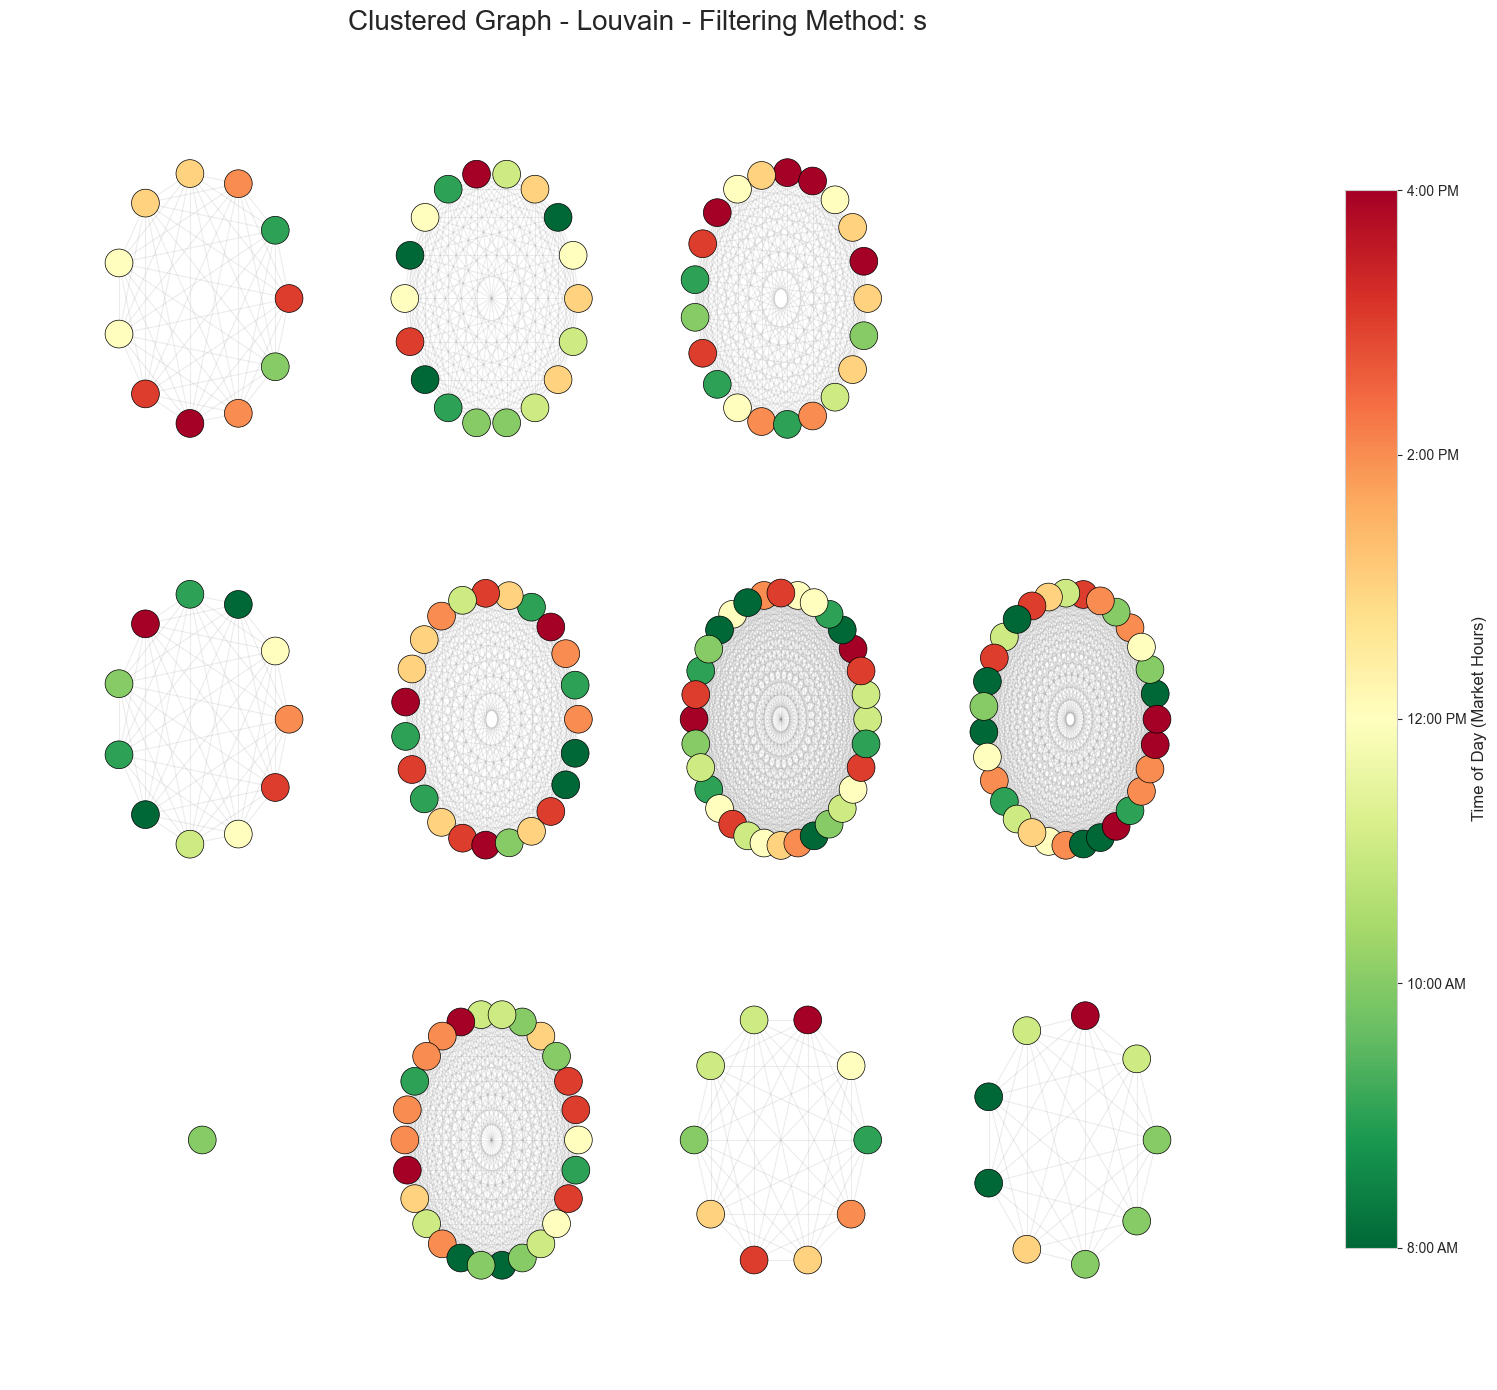

SSV [ 6.87181955e-05  1.60460501e-01 -1.94033795e-01 -3.44228087e+00]
SSV [-1.06630576e-04  3.73723370e-01 -4.08942112e-01 -1.63662320e+00]
SSV [6.88709397e-04 3.80448477e-02 6.94500667e-02 8.39716901e-01]
SSV [ 0.00171909  0.20046713  0.15106926 -0.53551258]
SSV [ 3.18771842e-04  2.84481231e-01  6.99265214e-02 -7.55435463e-01]
SSV [ 7.90157841e-06  4.19530495e-02 -8.37919848e-01  1.31349054e+00]
SSV [ 5.09773236e-04  2.45338997e-01 -5.01420466e-02 -3.73837991e+00]
SSV [-5.25091986e-04  3.91150272e-01 -1.44261772e-01 -6.73635101e-01]
SSV [ 8.68601281e-04  3.04495467e-01  5.01972066e-02 -1.05765087e+00]
SSV [ 1.88209396e-05  3.08252535e-01 -6.93443738e-02 -8.11084330e-01]


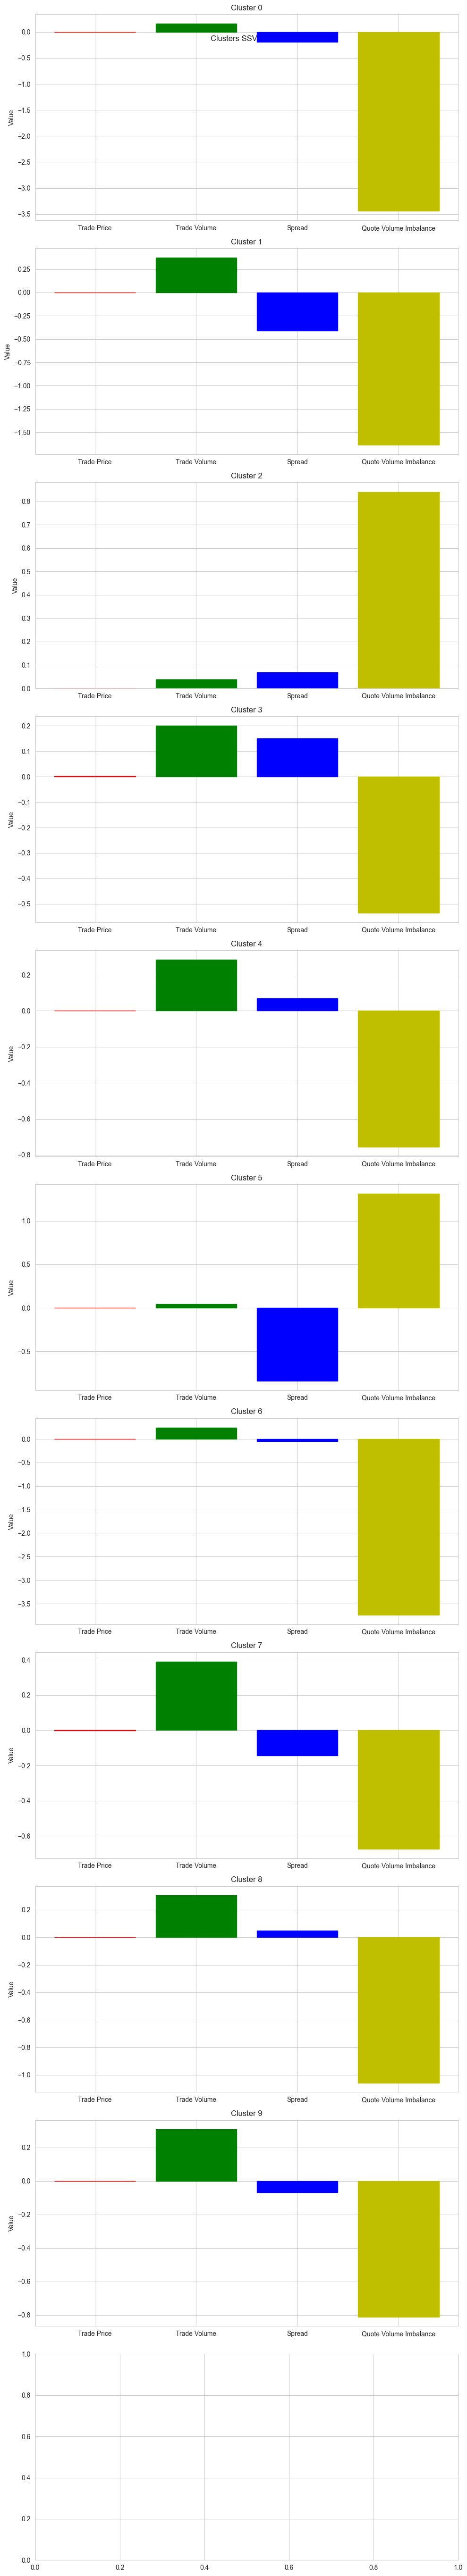

Filter type: g
Number of nodes: 193
Number of edges: 2197
Number of periods: 194
Number of clusters: 11
Cluster sizes: [22, 10, 16, 20, 23, 23, 11, 25, 32, 10, 0]
Transition matrix: 
[[0.04545455 0.04545455 0.13636364 0.04545455 0.18181818 0.13636364
  0.13636364 0.13636364 0.13636364 0.         0.        ]
 [0.         0.         0.1        0.1        0.1        0.1
  0.1        0.2        0.3        0.         0.        ]
 [0.3125     0.         0.         0.1875     0.0625     0.
  0.1875     0.0625     0.125      0.0625     0.        ]
 [0.1        0.05       0.         0.05       0.15       0.1
  0.05       0.2        0.2        0.1        0.        ]
 [0.17391304 0.04347826 0.17391304 0.04347826 0.13043478 0.13043478
  0.04347826 0.04347826 0.17391304 0.04347826 0.        ]
 [0.13043478 0.04347826 0.17391304 0.04347826 0.         0.04347826
  0.04347826 0.2173913  0.2173913  0.08695652 0.        ]
 [0.         0.         0.18181818 0.45454545 0.18181818 0.
  0.18181818 0.        

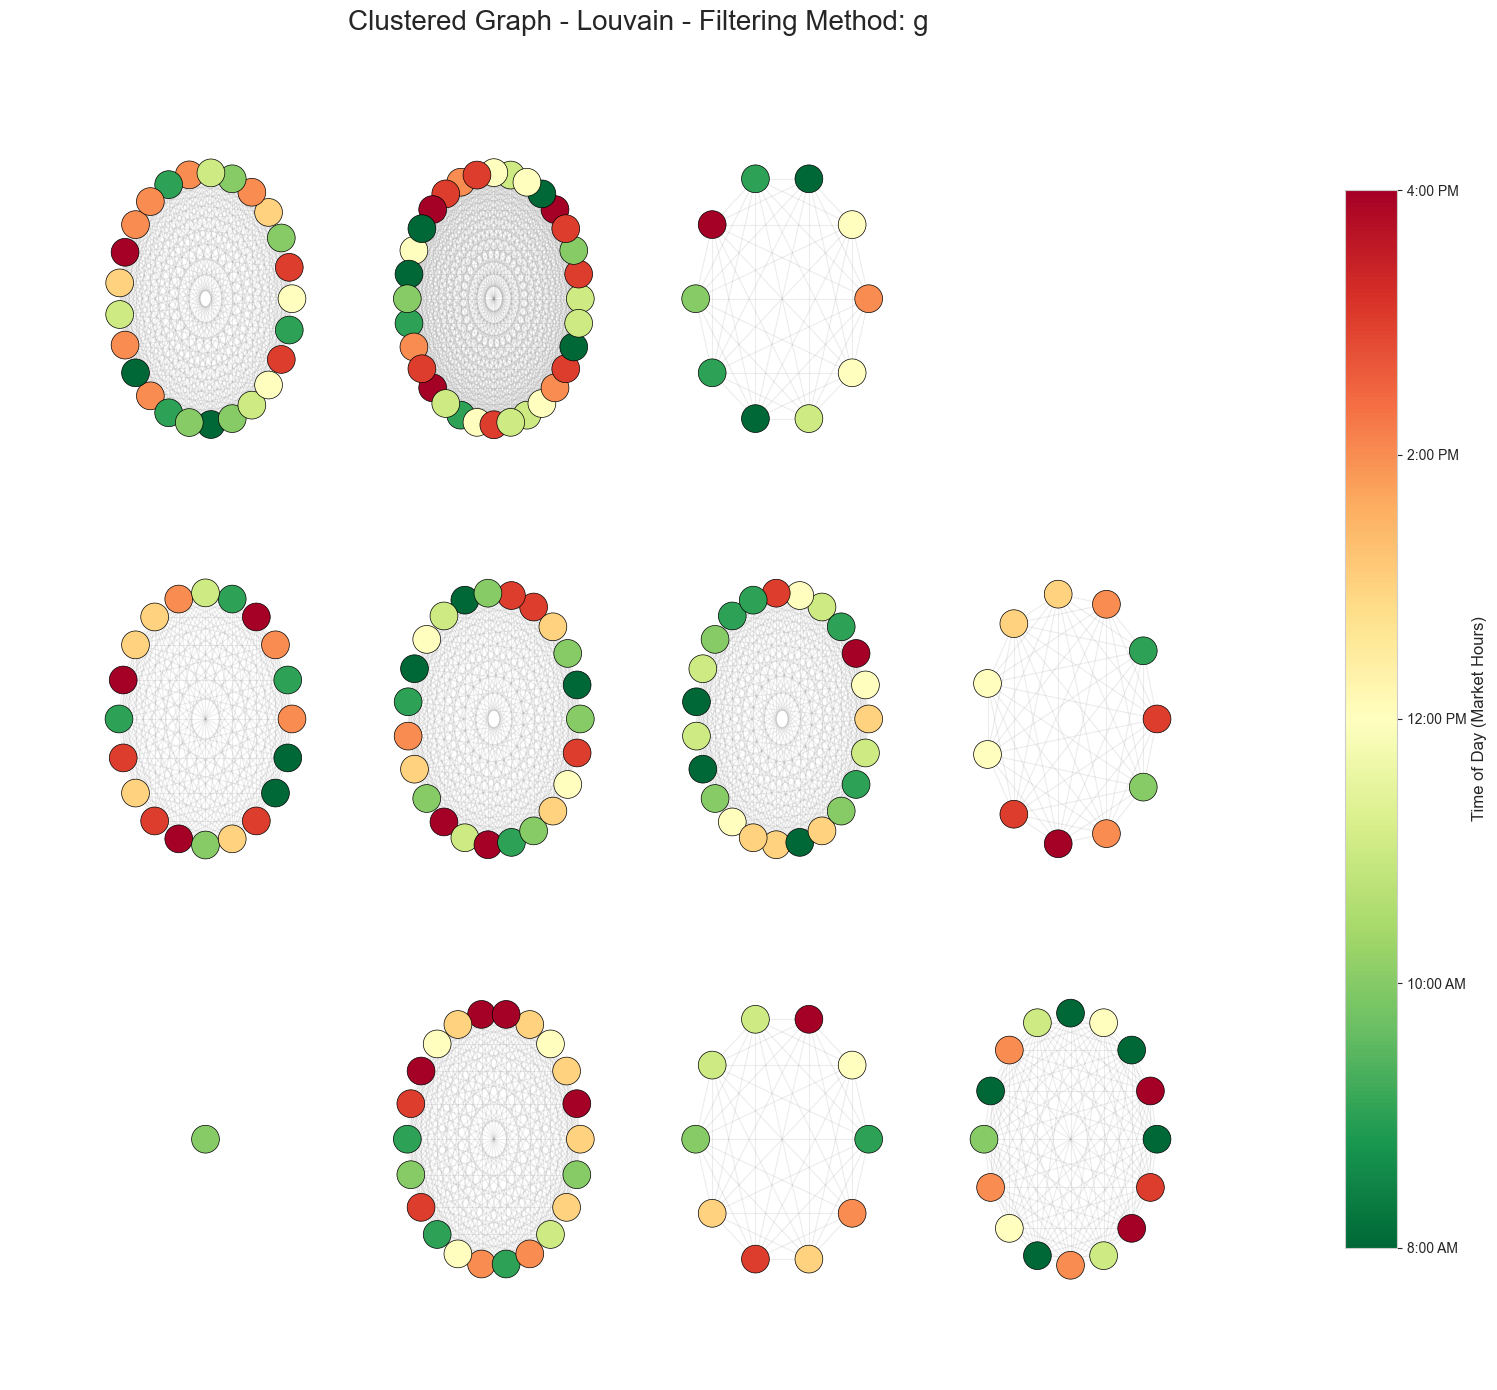

SSV [ 1.11867425e-04  3.76126843e-01 -4.64725493e-02 -8.15422095e-01]
SSV [-1.06630576e-04  3.73723370e-01 -4.08942112e-01 -1.63662320e+00]
SSV [ 8.81122753e-04  2.39145462e-01 -1.55449483e-01 -5.81922379e+00]
SSV [ 1.24739070e-05  2.36719974e-01  3.87260173e-02 -8.39164482e-01]
SSV [0.00054121 0.1099377  0.10155028 0.2528152 ]
SSV [ 3.88463825e-04  1.94561294e-01  8.68598255e-03 -9.92814995e-01]
SSV [-5.25091986e-04  3.91150272e-01 -1.44261772e-01 -6.73635101e-01]
SSV [ 2.75766112e-04  2.09622223e-01 -1.93976878e-01 -4.42754735e+00]
SSV [ 2.69779982e-04  1.02763895e-01 -8.37088634e-01  1.42228150e+00]
SSV [ 0.00125945  0.17968172  0.17656148 -0.51102437]


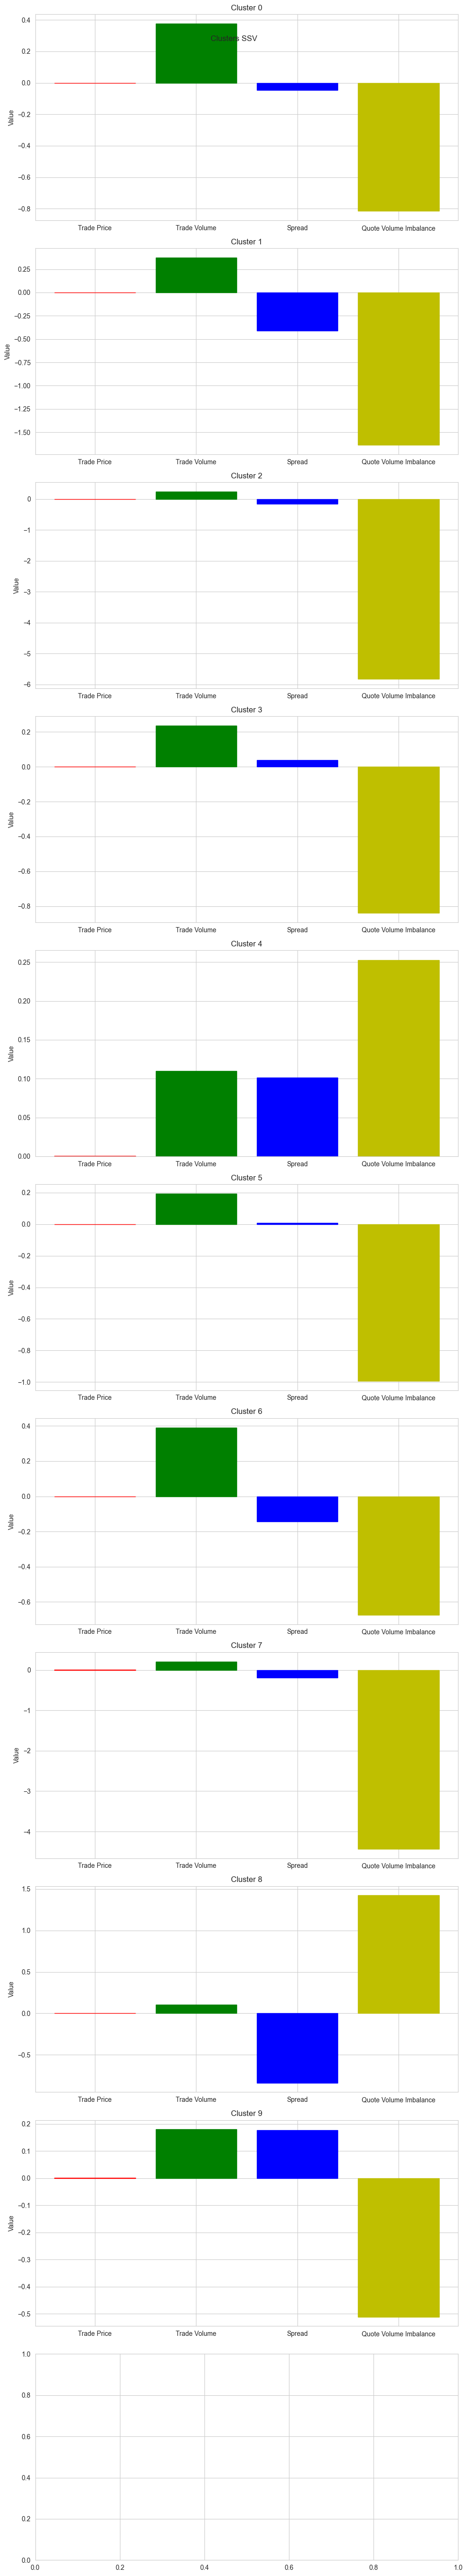

Filter type: delta
Number of nodes: 193
Number of edges: 1885
Number of periods: 194
Number of clusters: 12
Cluster sizes: [21, 24, 11, 29, 20, 10, 11, 28, 17, 11, 10, 0]
Transition matrix: 
[[0.04761905 0.19047619 0.04761905 0.14285714 0.19047619 0.
  0.14285714 0.0952381  0.0952381  0.         0.04761905 0.        ]
 [0.25       0.04166667 0.04166667 0.125      0.04166667 0.08333333
  0.125      0.16666667 0.08333333 0.04166667 0.         0.        ]
 [0.18181818 0.         0.         0.36363636 0.         0.09090909
  0.         0.09090909 0.27272727 0.         0.         0.        ]
 [0.03448276 0.13793103 0.03448276 0.24137931 0.13793103 0.03448276
  0.         0.20689655 0.06896552 0.03448276 0.06896552 0.        ]
 [0.1        0.15       0.05       0.2        0.         0.
  0.1        0.25       0.         0.1        0.05       0.        ]
 [0.         0.1        0.         0.2        0.1        0.
  0.1        0.2        0.         0.2        0.1        0.        ]
 [0.       

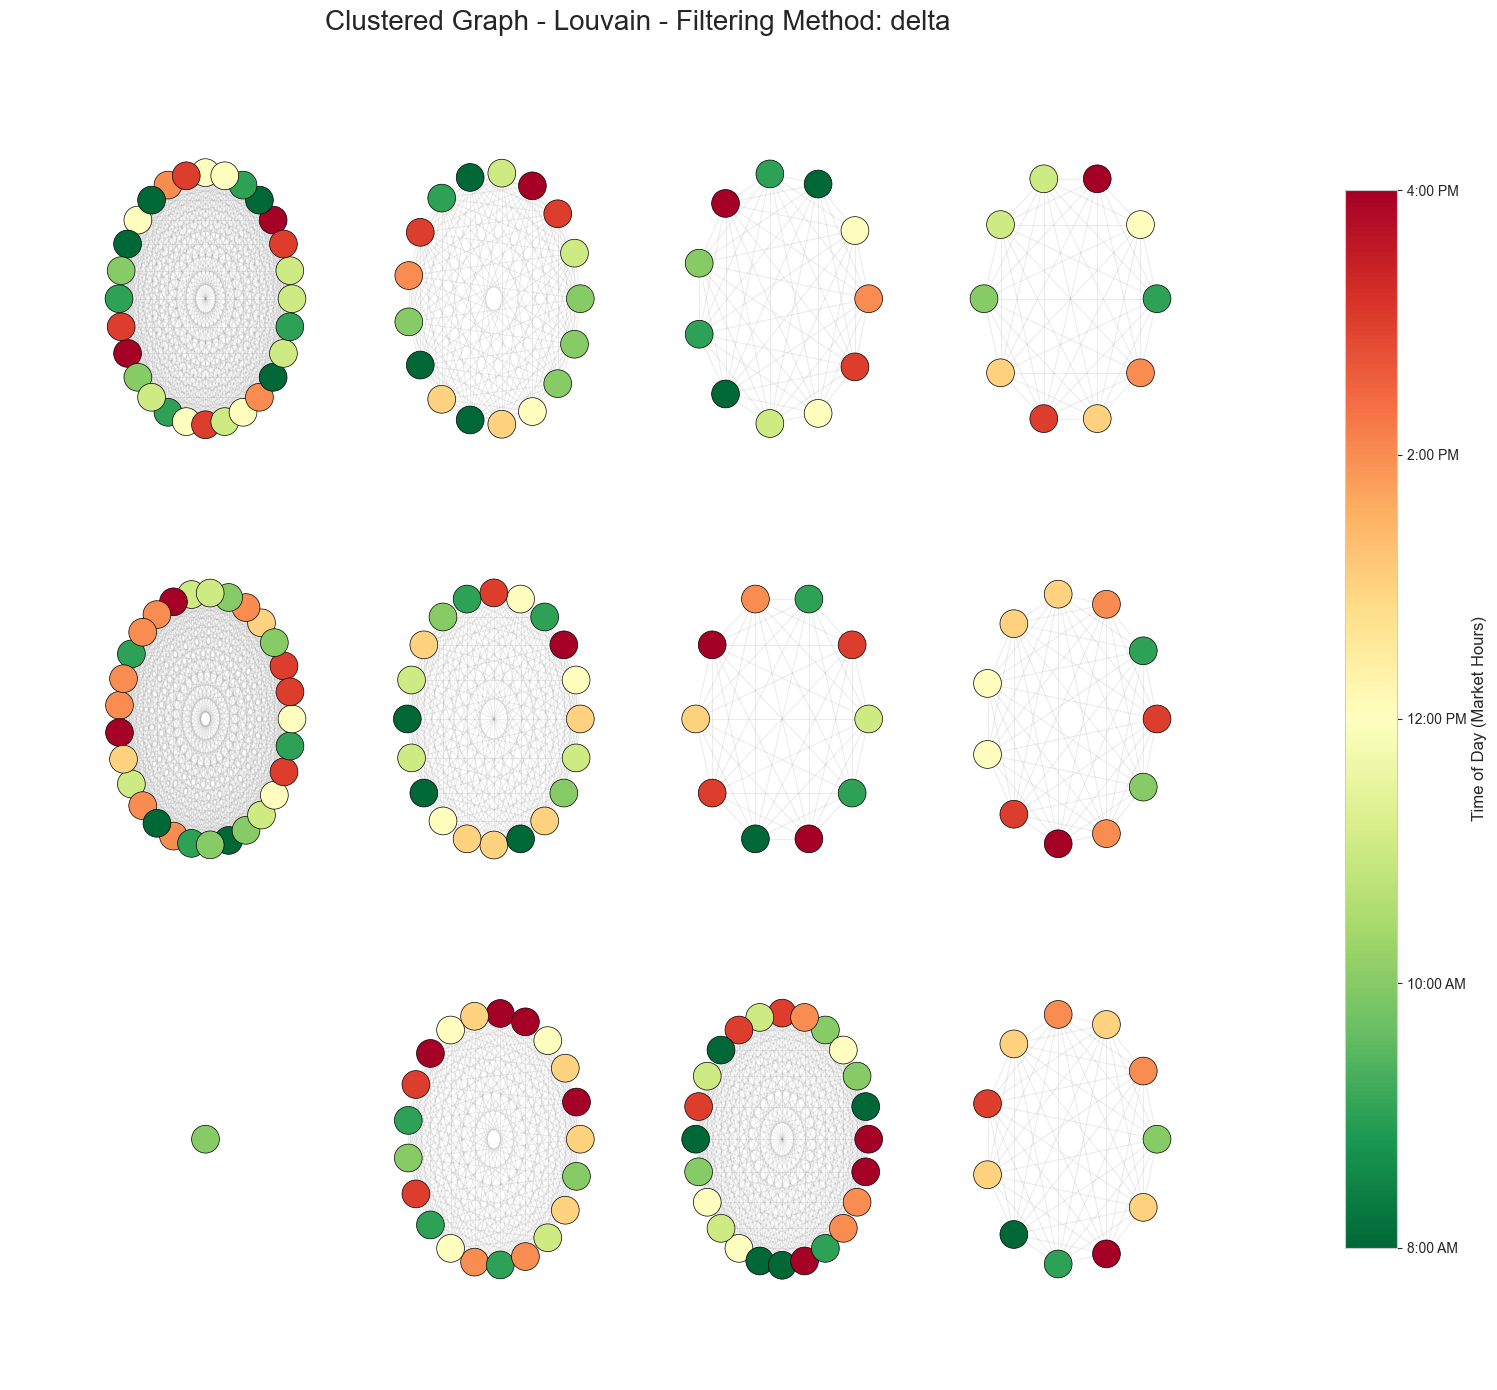

SSV [ 1.88209396e-05  3.08252535e-01 -6.93443738e-02 -8.11084330e-01]
SSV [ 4.97456181e-04  2.01492046e-01 -7.96356743e-02 -4.64537141e+00]
SSV [-4.47107346e-04  5.07484118e-01  1.08261302e-01 -2.06312584e-03]
SSV [ 2.63266238e-04  1.98248762e-01 -1.81044817e-01 -3.18109268e+00]
SSV [ 7.72376636e-04  3.14872039e-01  3.70917592e-02 -9.77870985e-01]
SSV [ 7.23350256e-04  9.53561494e-02  1.74817855e-03 -1.76671104e+00]
SSV [-5.25091986e-04  3.91150272e-01 -1.44261772e-01 -6.73635101e-01]
SSV [ 8.05537131e-05  4.25443370e-02 -9.56767609e-01  1.04409807e+00]
SSV [4.36201542e-04 5.15751545e-02 1.01473569e-01 1.14943636e+00]
SSV [ 0.00171909  0.20046713  0.15106926 -0.53551258]
SSV [-1.06630576e-04  3.73723370e-01 -4.08942112e-01 -1.63662320e+00]


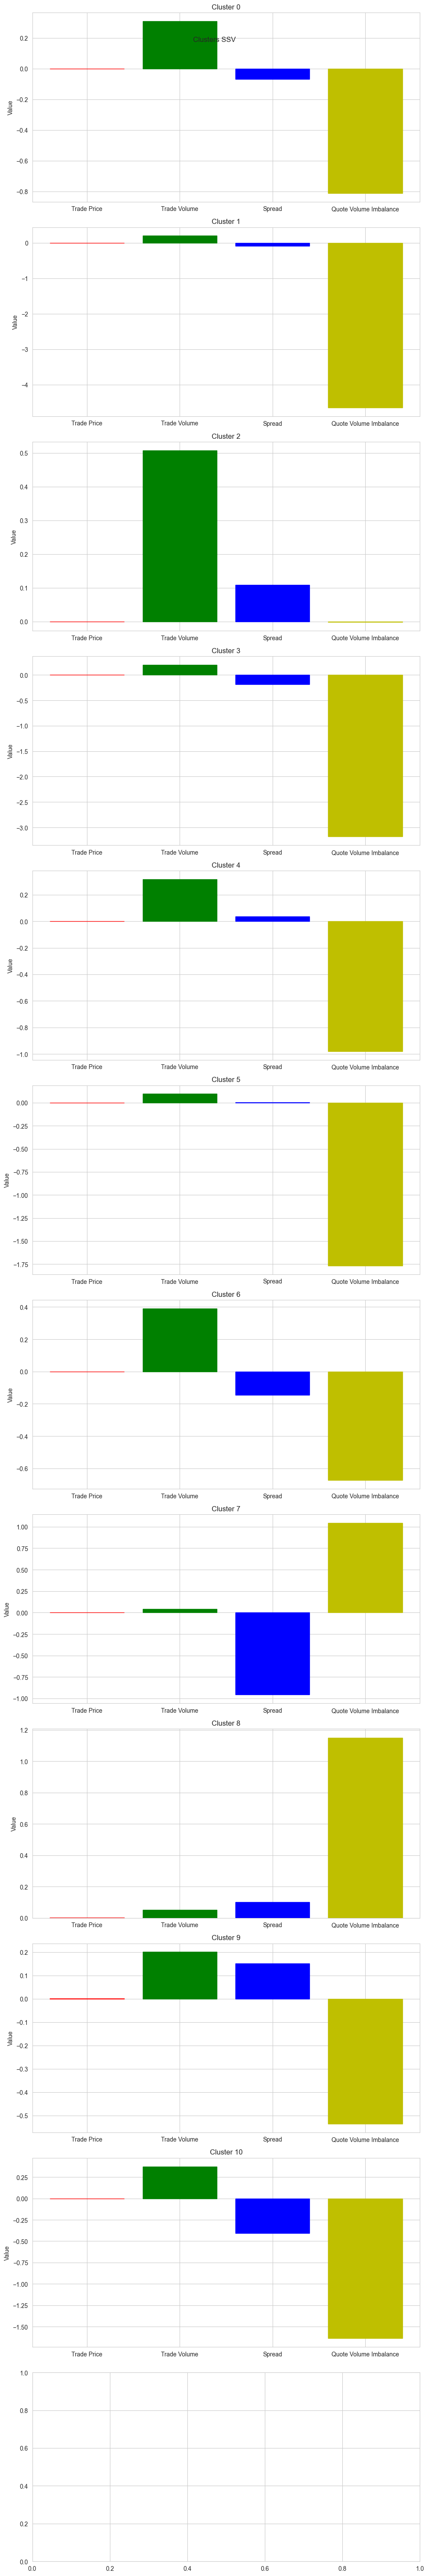

In [ ]:
graphs = {
    's': state_graph_s,
    'g': state_graph_g,
    'delta': state_graph_delta
}

for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = LouvainClustering().fit(periods, G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Louvain - Filtering Method: {filter_type}')
    clustering.plot_ssv()

### 2.2 - Greedy Clustering

Filter type: s
Number of nodes: 193
Number of edges: 2213
Number of periods: 194
Number of clusters: 8
Cluster sizes: [51, 36, 34, 31, 16, 13, 11, 0]
Transition matrix: 
[[0.19607843 0.19607843 0.21568627 0.17647059 0.05882353 0.05882353
  0.07843137 0.01960784]
 [0.30555556 0.13888889 0.05555556 0.19444444 0.16666667 0.08333333
  0.05555556 0.        ]
 [0.38235294 0.23529412 0.02941176 0.11764706 0.08823529 0.05882353
  0.08823529 0.        ]
 [0.19354839 0.19354839 0.16129032 0.19354839 0.09677419 0.12903226
  0.03225806 0.        ]
 [0.375      0.125      0.375      0.0625     0.0625     0.
  0.         0.        ]
 [0.23076923 0.15384615 0.23076923 0.30769231 0.07692308 0.
  0.         0.        ]
 [0.18181818 0.18181818 0.45454545 0.         0.         0.09090909
  0.09090909 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]]
Count of periods per time:
08:00 : 21
09:00 : 21
10:00 : 22
11:00 : 22
12:00 : 22
13:00 : 22
14:00 : 22
15:00

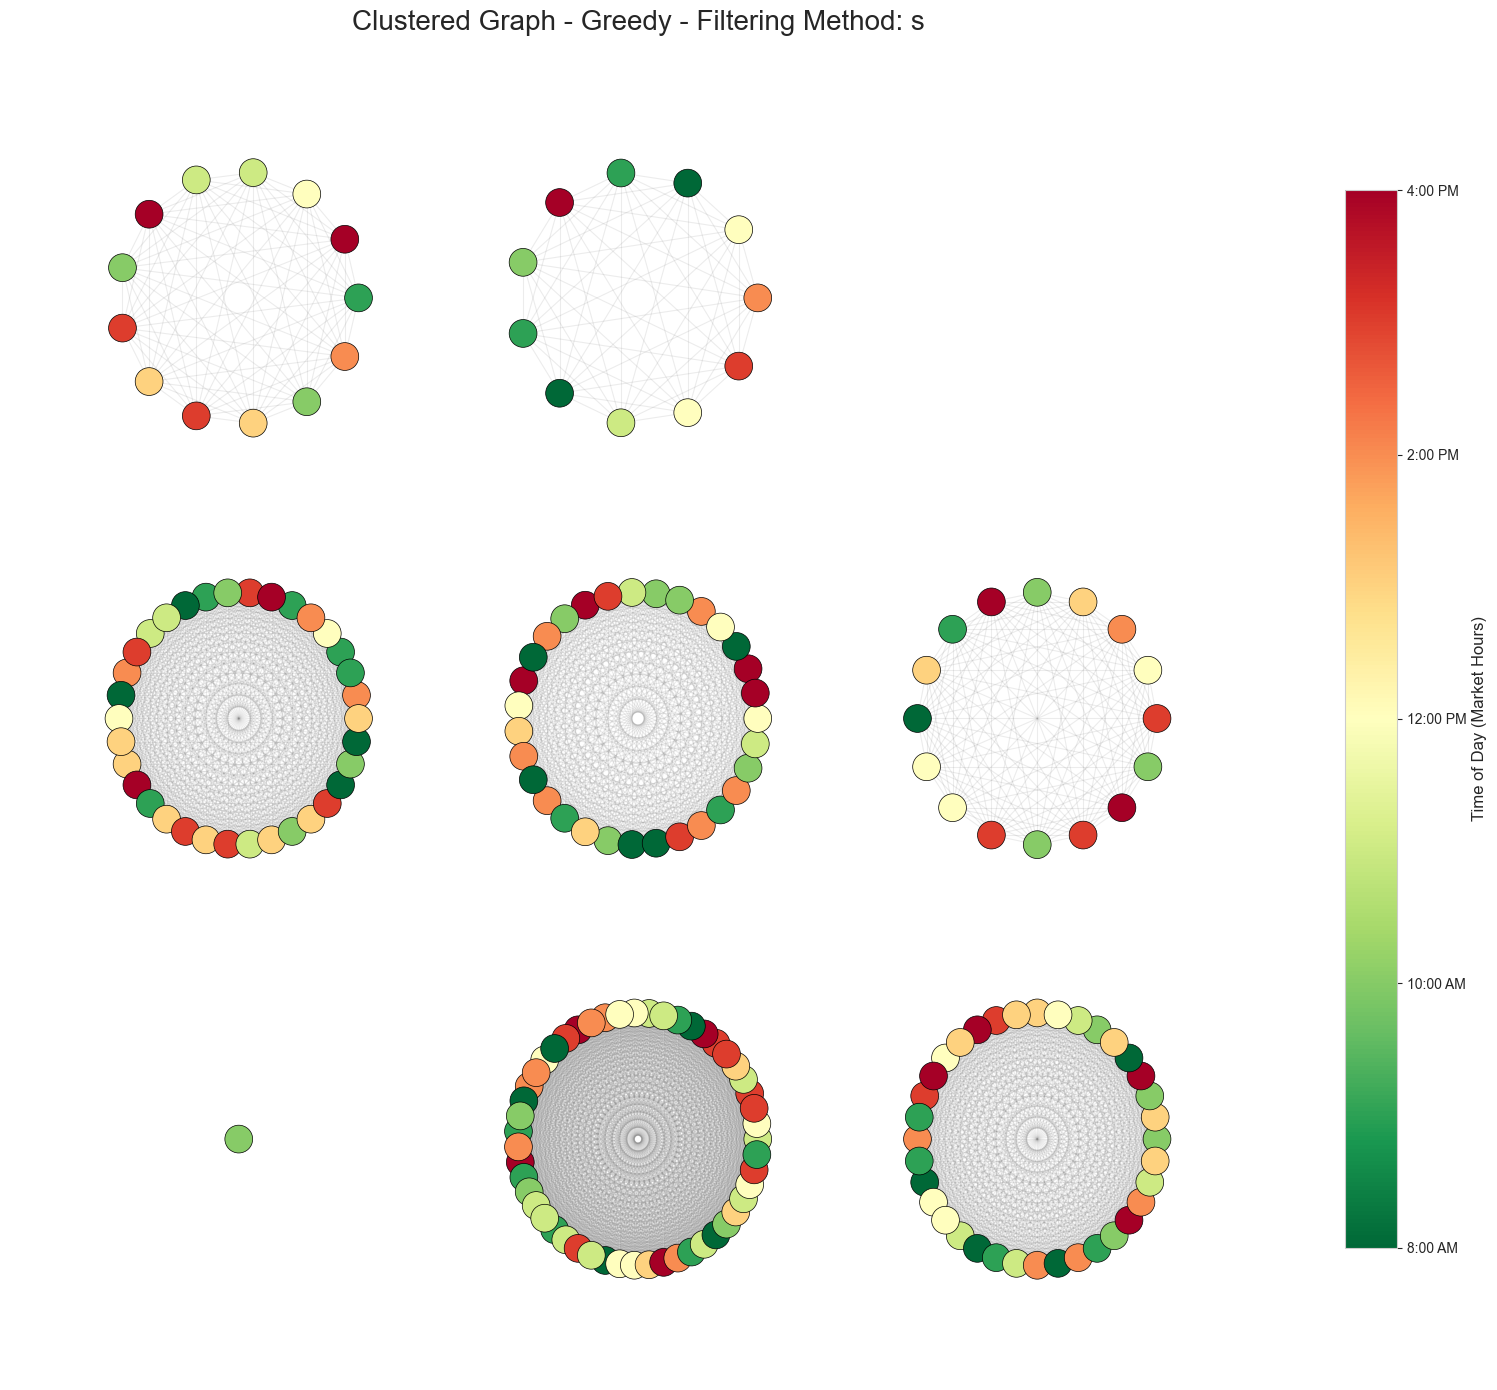

SSV [ 1.29320911e-04  5.58344263e-02 -4.24188536e-01 -4.35104453e-01]
SSV [ 4.12086092e-04  2.65199471e-01  4.33319441e-02 -2.85159464e+00]
SSV [ 1.19779205e-04  3.41754408e-01 -8.22254790e-02 -6.81761501e-01]
SSV [ 2.62548179e-04  2.15405793e-01 -2.67470322e-01 -1.52866186e+00]
SSV [ 3.53347904e-04  3.28925700e-01 -1.16870124e-01 -1.20825791e+00]
SSV [ 9.72967127e-05  3.11137110e-01 -3.36731214e-01 -1.40564474e+00]
SSV [ 0.00171909  0.20046713  0.15106926 -0.53551258]


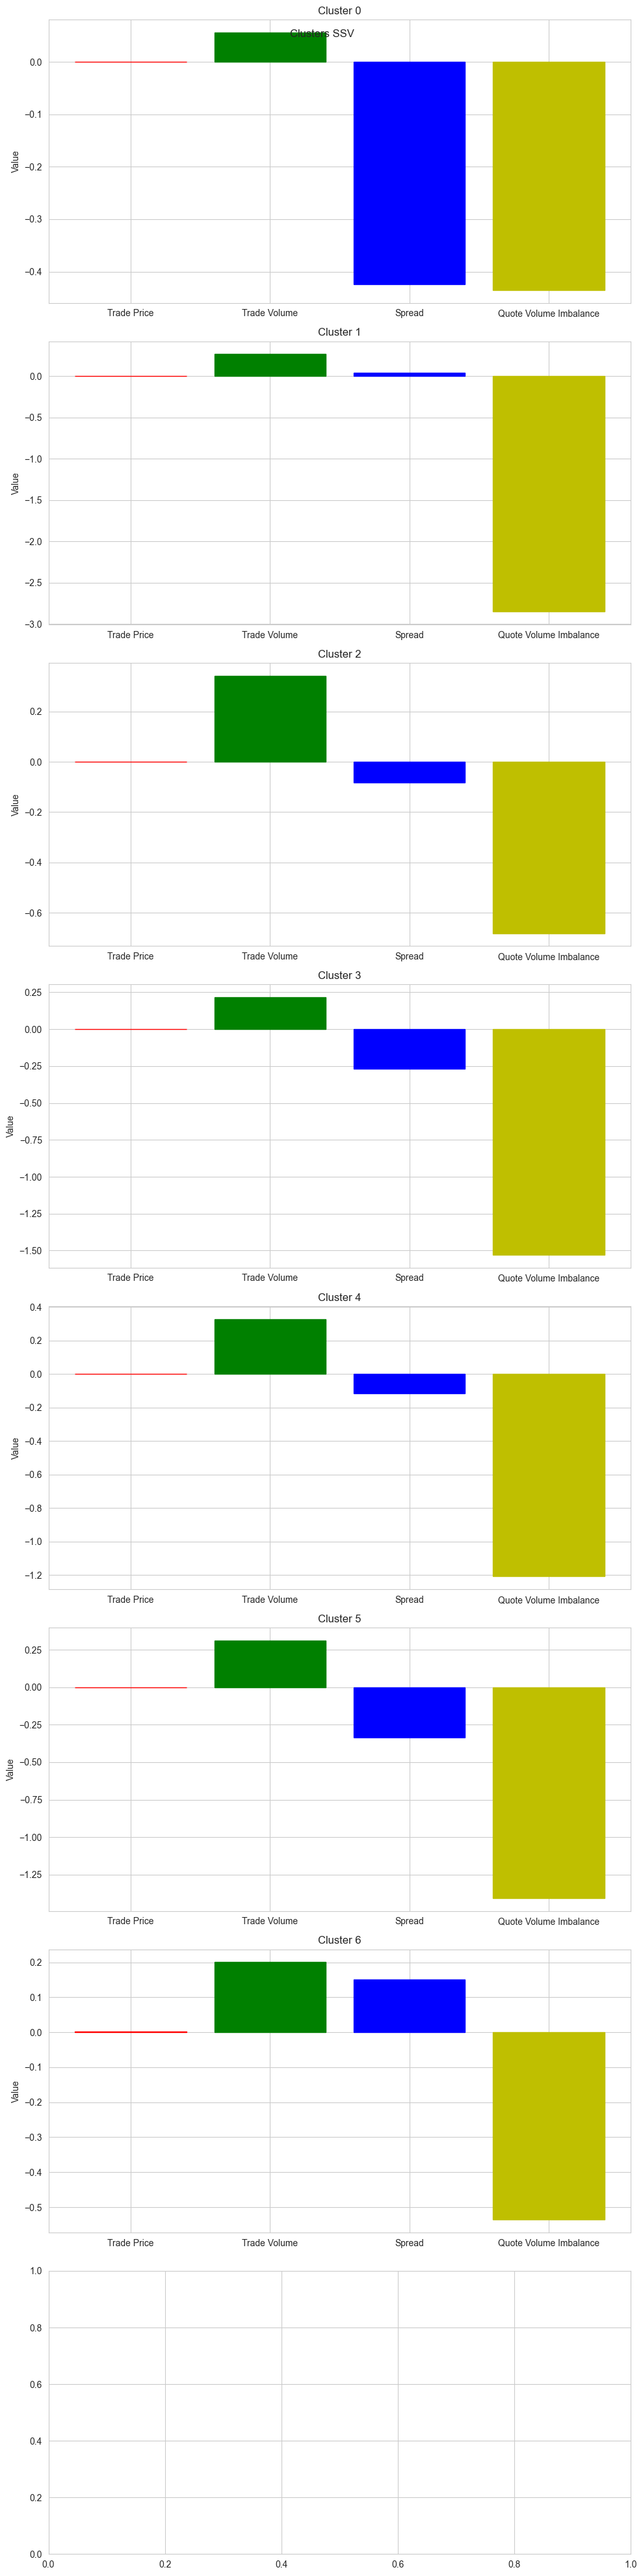

Filter type: g
Number of nodes: 193
Number of edges: 2197
Number of periods: 194
Number of clusters: 9
Cluster sizes: [51, 29, 29, 21, 19, 18, 13, 12, 0]
Transition matrix: 
[[0.29411765 0.11764706 0.15686275 0.1372549  0.03921569 0.09803922
  0.09803922 0.05882353 0.        ]
 [0.17241379 0.24137931 0.13793103 0.13793103 0.20689655 0.
  0.03448276 0.06896552 0.        ]
 [0.24137931 0.24137931 0.06896552 0.10344828 0.10344828 0.17241379
  0.         0.06896552 0.        ]
 [0.38095238 0.04761905 0.0952381  0.04761905 0.0952381  0.14285714
  0.14285714 0.04761905 0.        ]
 [0.21052632 0.21052632 0.36842105 0.         0.         0.05263158
  0.05263158 0.10526316 0.        ]
 [0.33333333 0.16666667 0.11111111 0.11111111 0.11111111 0.
  0.05555556 0.11111111 0.        ]
 [0.30769231 0.         0.15384615 0.15384615 0.07692308 0.23076923
  0.07692308 0.         0.        ]
 [0.16666667 0.16666667 0.08333333 0.16666667 0.16666667 0.08333333
  0.08333333 0.         0.08333333]
 [0.      

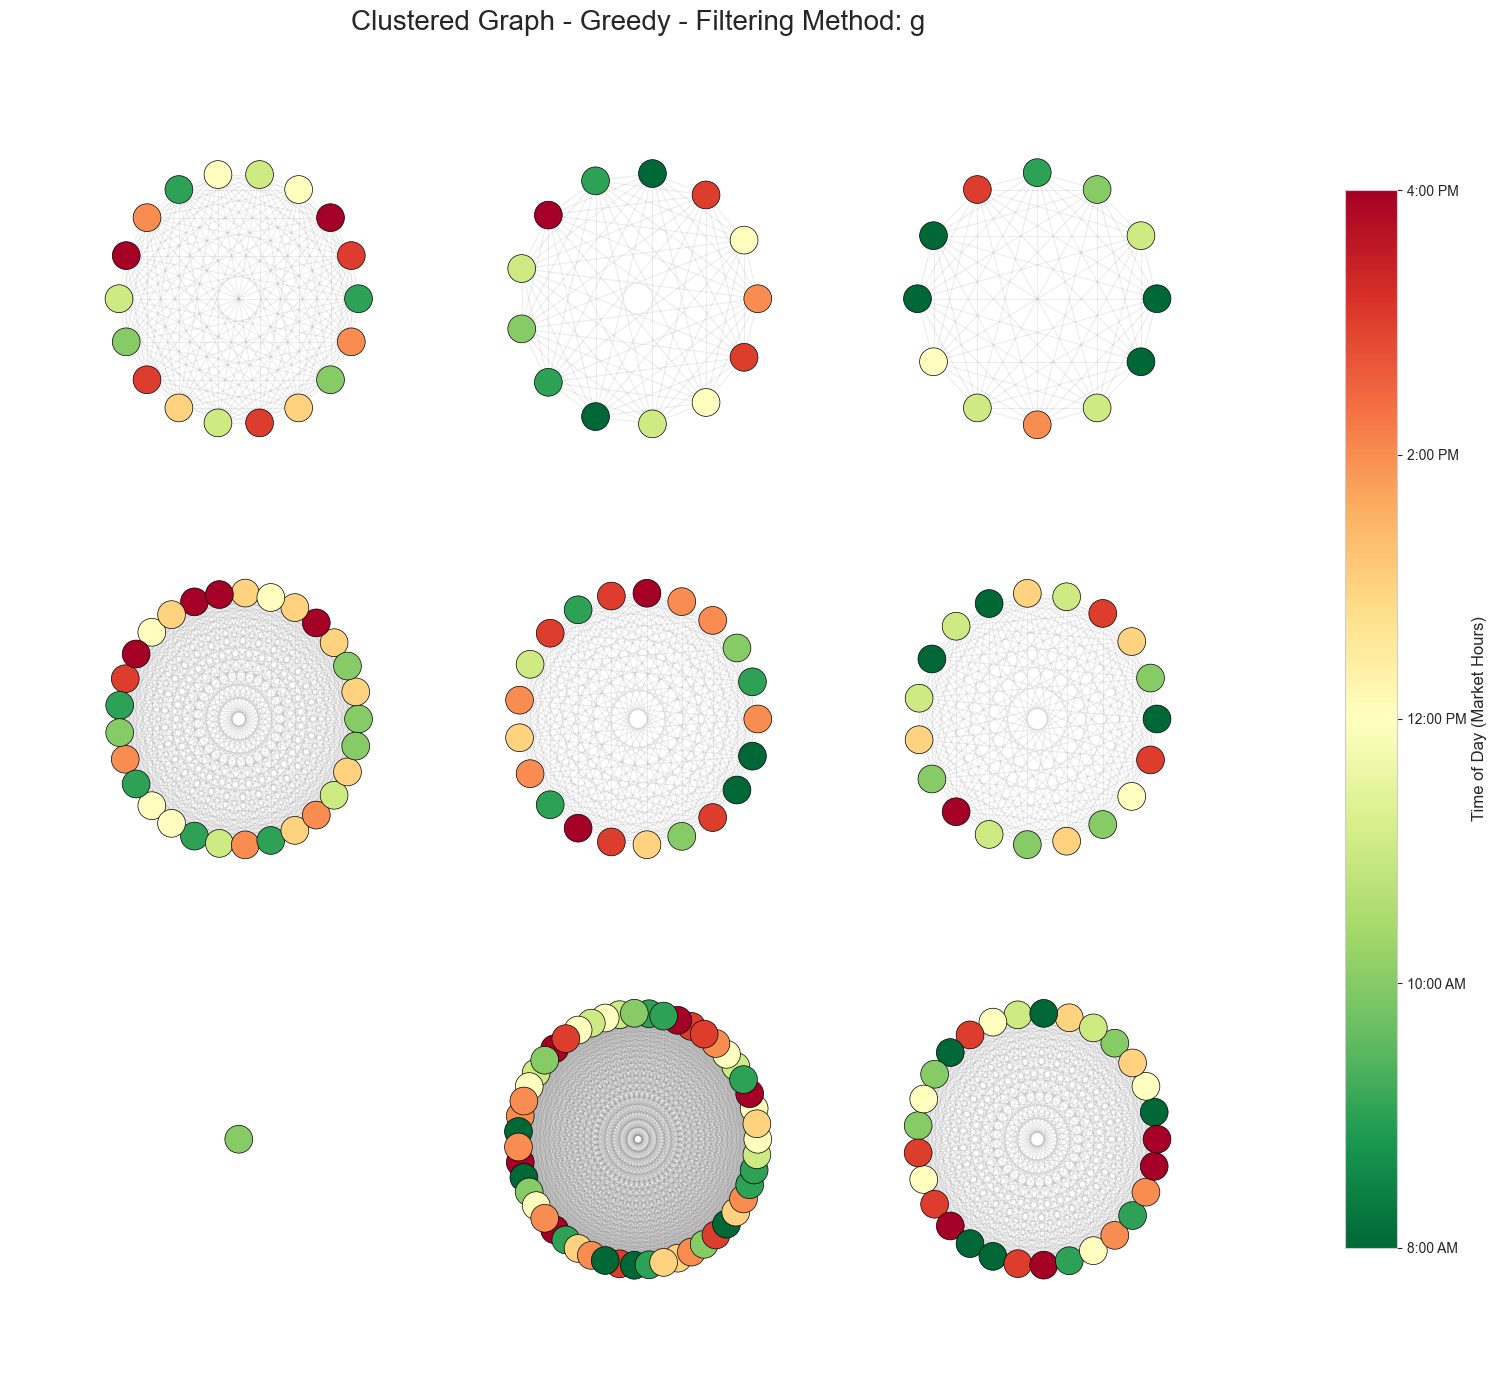

SSV [ 0.00017951  0.11236896 -0.07137675 -0.13083544]
SSV [ 2.55435375e-04  2.54765286e-01 -1.66497822e-01 -1.34222395e+00]
SSV [ 1.30388039e-04  2.99536569e-01 -2.83258978e-02 -3.20288987e+00]
SSV [ 4.76682532e-04  3.03860779e-01  2.46630645e-02 -4.56402336e+00]
SSV [ 5.55580547e-04  2.94531869e-01 -1.33160108e-01  1.39236666e+00]
SSV [-9.81282665e-06  2.32516811e-01 -2.64607042e-01 -1.38681720e+00]
SSV [ 0.00131302  0.19863011  0.12083935 -0.82914262]
SSV [ 1.38948769e-04  1.37870966e-01 -1.77102852e+00  3.91642223e-01]


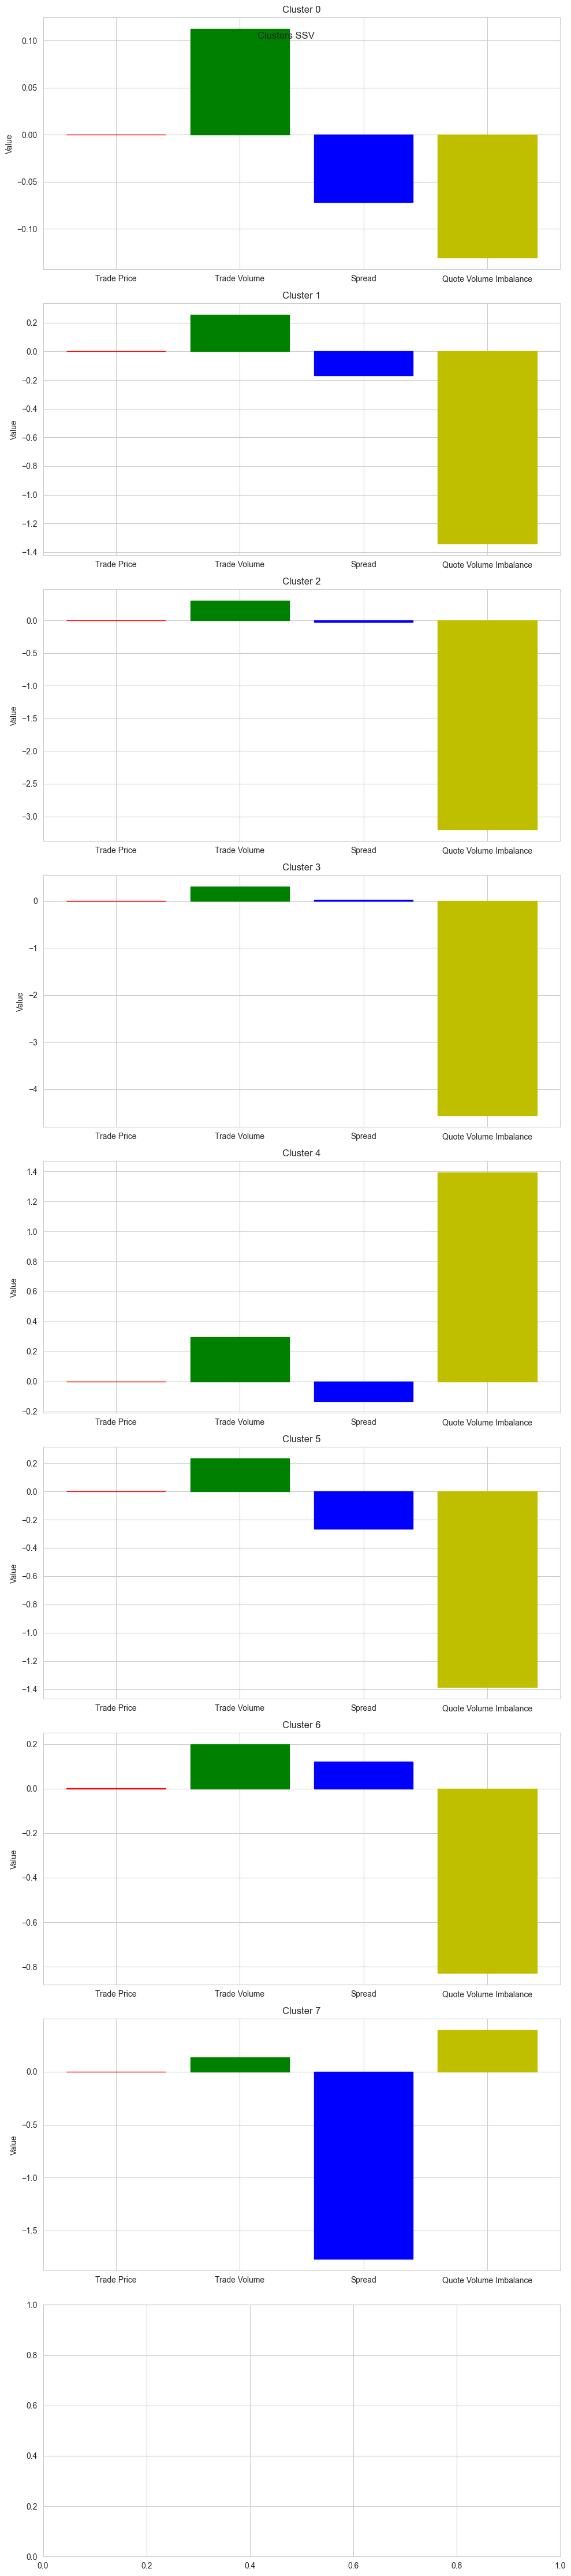

Filter type: delta
Number of nodes: 193
Number of edges: 1885
Number of periods: 194
Number of clusters: 9
Cluster sizes: [58, 33, 25, 21, 16, 15, 13, 11, 0]
Transition matrix: 
[[0.27586207 0.17241379 0.10344828 0.12068966 0.0862069  0.06896552
  0.0862069  0.06896552 0.01724138]
 [0.24242424 0.18181818 0.18181818 0.06060606 0.15151515 0.06060606
  0.06060606 0.06060606 0.        ]
 [0.24       0.16       0.08       0.12       0.12       0.16
  0.08       0.04       0.        ]
 [0.38095238 0.19047619 0.19047619 0.         0.04761905 0.
  0.0952381  0.0952381  0.        ]
 [0.5        0.0625     0.0625     0.3125     0.0625     0.
  0.         0.         0.        ]
 [0.33333333 0.2        0.13333333 0.         0.         0.2
  0.06666667 0.06666667 0.        ]
 [0.23076923 0.15384615 0.30769231 0.15384615 0.15384615 0.
  0.         0.         0.        ]
 [0.36363636 0.18181818 0.         0.18181818 0.         0.09090909
  0.09090909 0.09090909 0.        ]
 [0.         0.         0. 

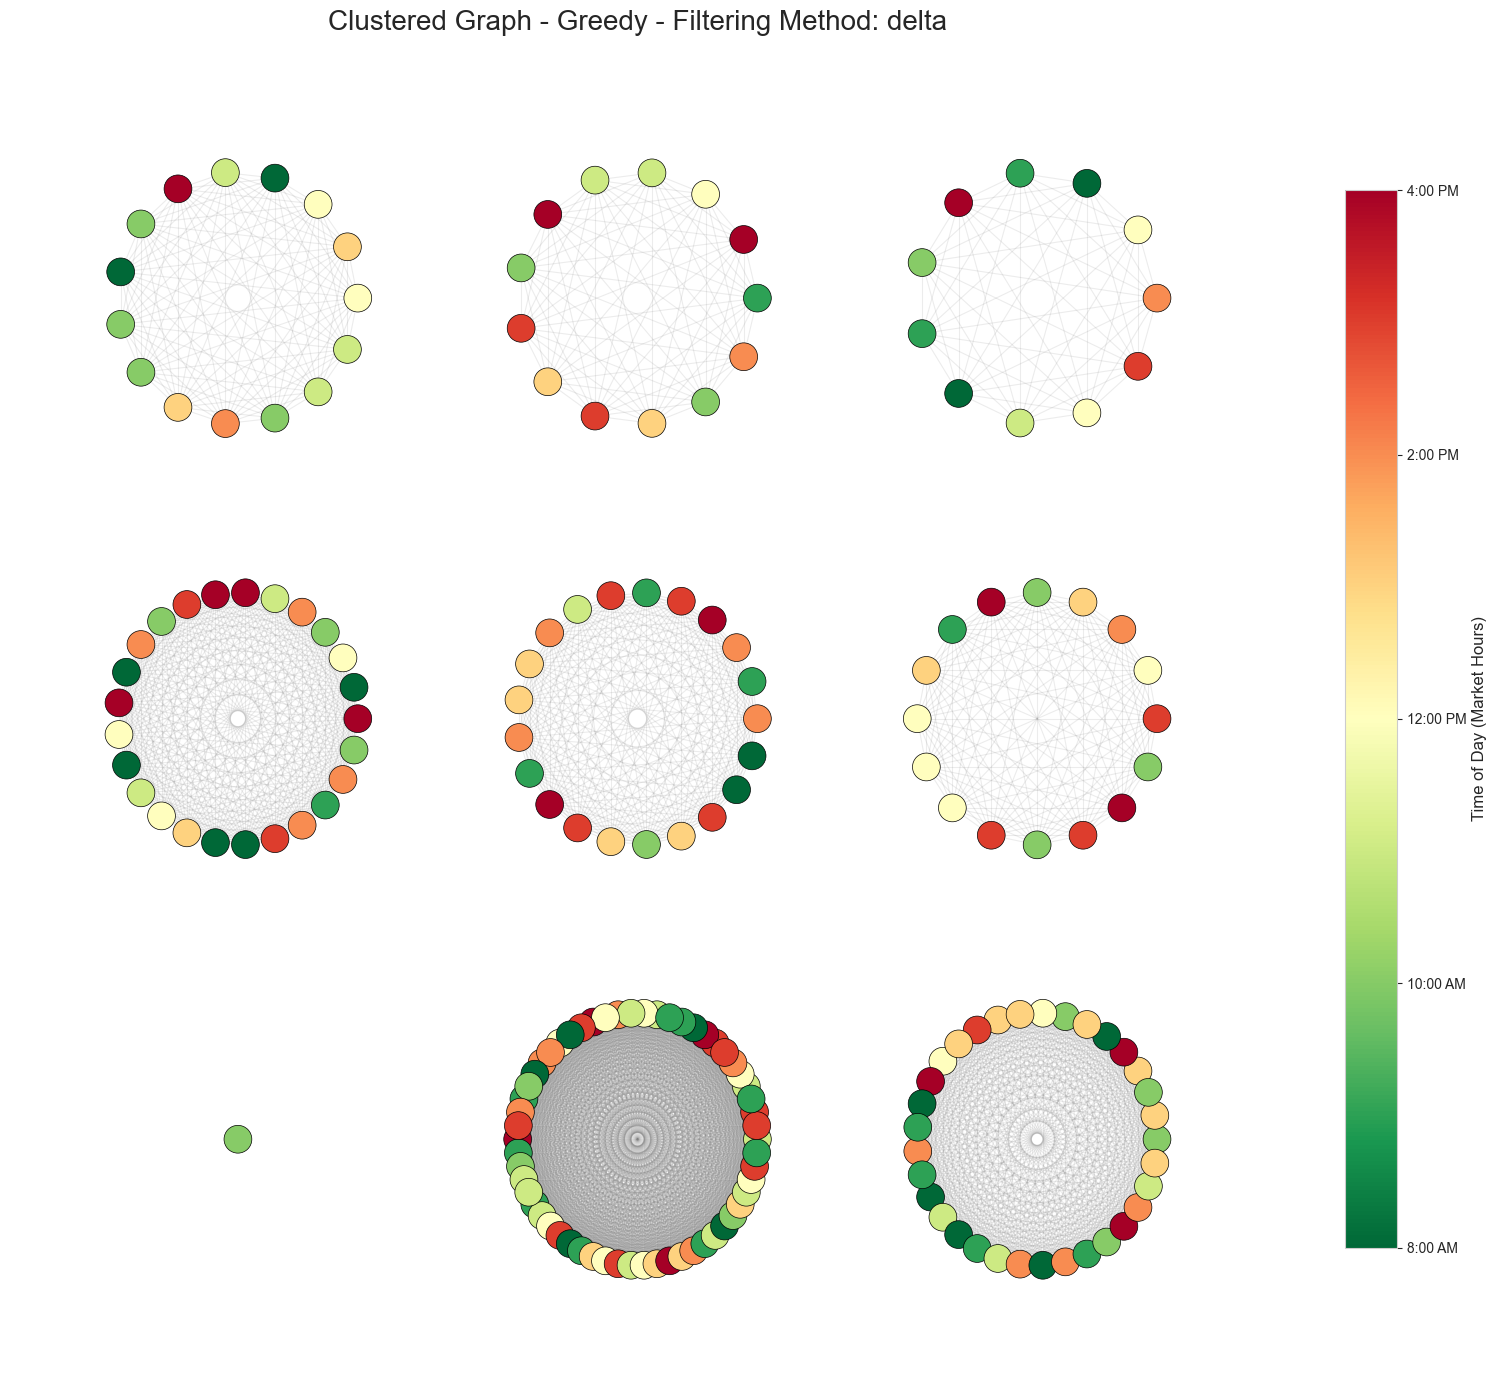

SSV [ 8.21841767e-05  6.35688457e-02 -4.61540432e-01  7.86765285e-01]
SSV [ 8.51291792e-04  2.35917092e-01  5.53482886e-02 -2.98009341e+00]
SSV [-6.42967899e-05  1.97677942e-01 -3.03354608e-01 -3.84884829e+00]
SSV [ 3.24362159e-04  3.36057304e-01  3.60809240e-02 -1.06572455e+00]
SSV [-1.71114478e-04  3.44787389e-01 -1.48191698e-01 -1.15053941e+00]
SSV [ 2.64656895e-04  4.64451342e-01  7.39500592e-02 -1.66850132e+00]
SSV [ 9.72967127e-05  3.11137110e-01 -3.36731214e-01 -1.40564474e+00]
SSV [ 0.00171909  0.20046713  0.15106926 -0.53551258]


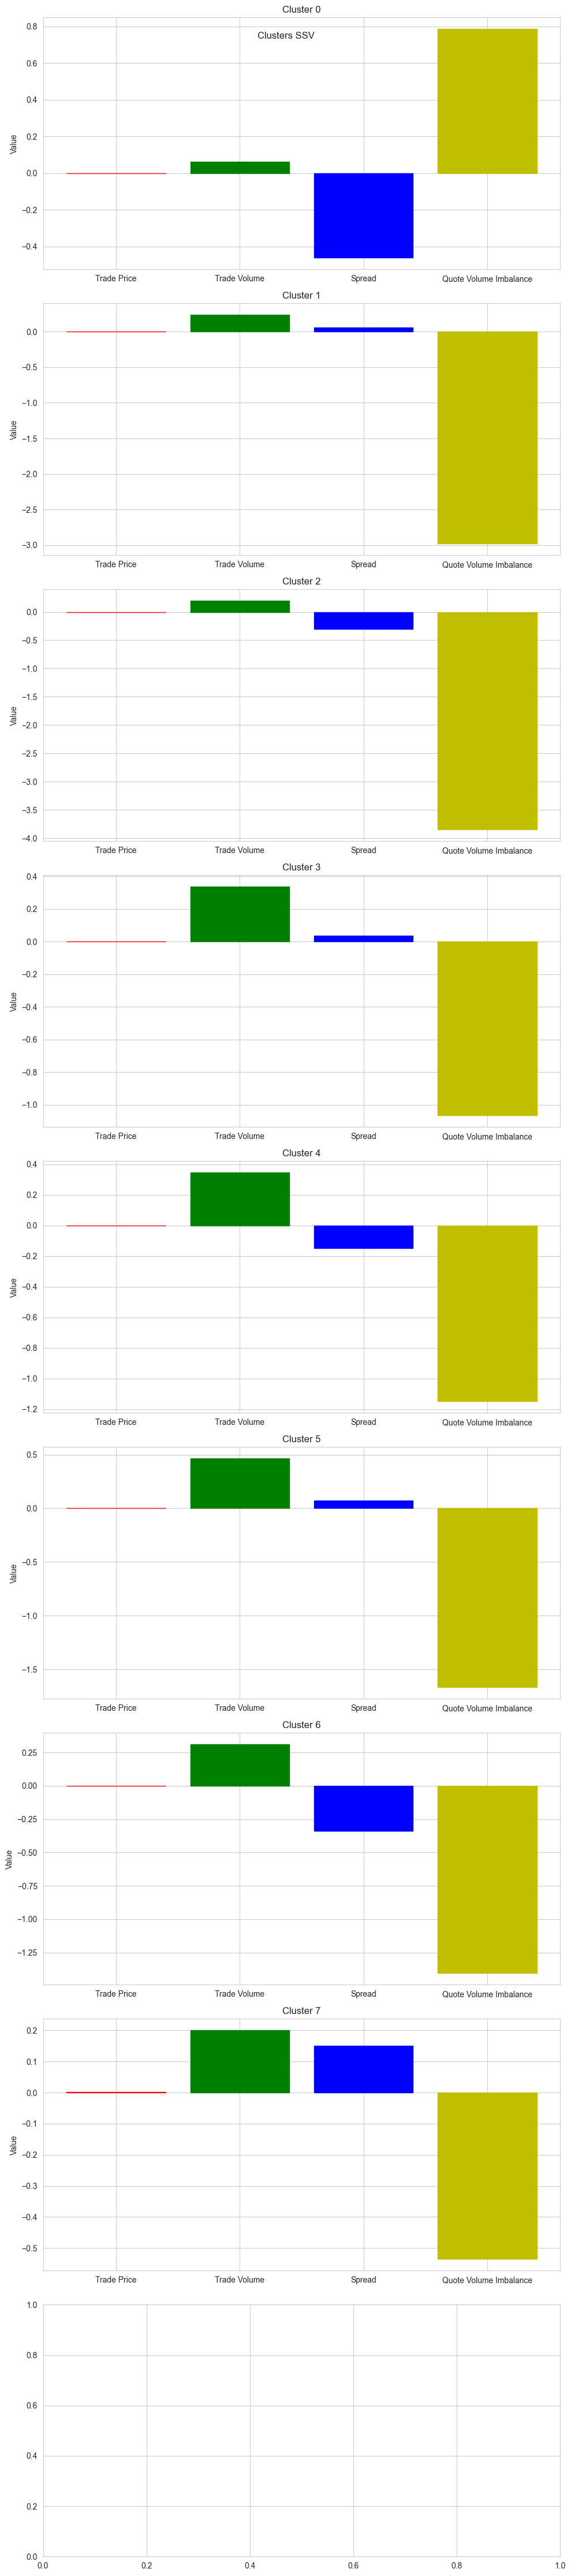

In [ ]:
for filter_type, G in graphs.items():
    print(f"Filter type: {filter_type}")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Clustering process
    clustering = GreedyClustering().fit(periods,  G=G)

    # Get the clusters
    clusters = clustering.clusters

    print(f"Number of periods: {len(periods)}")
    print(f"Number of clusters: {len(clusters)}")
    print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
    print(f"Transition matrix: \n{clustering.transition_matrix}")

    clustering.plot_cluster_2(method=f'Greedy - Filtering Method: {filter_type}')
    clustering.plot_ssv()